# House Price Prediction



A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price.The company is looking at prospective properties to buy to enter the market. The company has collected a data set from the sale of houses in Australia. Company wants to predict the actual value of the prospective properties and decide whether to invest in them or not.

## 1.Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.metrics import r2_score
from scipy import stats

## 2.Data Reading and Cleaning

In [2]:
# Loading the House Pricing dataset
data = pd.read_csv('dataset.csv')
pd.set_option('display.max_columns',None)

In [3]:
data.head(2)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   

  GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
0     Attchd       2003.0          RFn           2         548         TA   
1     Attchd       1976.0          RFn           2         460         TA   

  GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0         TA          Y           0           61              0          0   
1         TA          Y         298            0              0          0   

   ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold  \
0            0         0    NaN   NaN         NaN        0       2    2008   
1            0         0    NaN   NaN         NaN        0       5    2007   

  SaleType SaleCondition  SalePrice  
0       WD        Normal     208500  
1       WD        Normal     181500

In [4]:
# Shape of the dataset
data.shape

(1460, 81)

In [5]:
data.describe(percentiles=[0.20,0.25,0.50,0.75])

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
20%     292.800000    20.000000    53.000000    7078.400000     5.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
20%       5.000000  1947.800000   1961.800000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
20%       0.000000   172.000000   755.800000   848.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
20%        0.000000  1066.600000      0.000000      0.000000     1.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
20%       0.000000      2.000000      1.000000      5.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   

In [6]:
# Checking Duplicates if any
data[data.duplicated()]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

In [7]:
### Dealing with Null values and Outliers

def null_values(df):
    m=[]
    a = df.isnull().sum()
    for i in (a/len(df))*100:
             m.append(i)
    dictn={'columns':list(df),'Null %':m}
    k=pd.DataFrame(dictn)
    p=k[k['Null %']!=0]
    return p
null_values(data).sort_values(ascending=False,by=['Null %'])

columns     Null %
72        PoolQC  99.520548
74   MiscFeature  96.301370
6          Alley  93.767123
73         Fence  80.753425
57   FireplaceQu  47.260274
3    LotFrontage  17.739726
58    GarageType   5.547945
59   GarageYrBlt   5.547945
60  GarageFinish   5.547945
63    GarageQual   5.547945
64    GarageCond   5.547945
32  BsmtExposure   2.602740
35  BsmtFinType2   2.602740
33  BsmtFinType1   2.534247
31      BsmtCond   2.534247
30      BsmtQual   2.534247
26    MasVnrArea   0.547945
25    MasVnrType   0.547945
42    Electrical   0.068493

In [8]:
### Droping columns with null values more than 50 percentage

In [9]:
cols_drop =['Id','Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [10]:
data.drop(cols_drop,axis=1,inplace =True)

In [11]:
null_values(data).sort_values(by='Null %',ascending=False)

columns     Null %
55   FireplaceQu  47.260274
2    LotFrontage  17.739726
56    GarageType   5.547945
57   GarageYrBlt   5.547945
58  GarageFinish   5.547945
61    GarageQual   5.547945
62    GarageCond   5.547945
30  BsmtExposure   2.602740
33  BsmtFinType2   2.602740
28      BsmtQual   2.534247
29      BsmtCond   2.534247
31  BsmtFinType1   2.534247
23    MasVnrType   0.547945
24    MasVnrArea   0.547945
40    Electrical   0.068493

In [12]:
##### 1.Dealing with FireplaceQu (Categorical value)
data['FireplaceQu'].value_counts(dropna=False)
# Filling Nan with 'Not defined'
data['FireplaceQu'].fillna('Not Defined',inplace=True)
data['FireplaceQu'].value_counts(dropna=False)

Not Defined    690
Gd             380
TA             313
Fa              33
Ex              24
Po              20
Name: FireplaceQu, dtype: int64

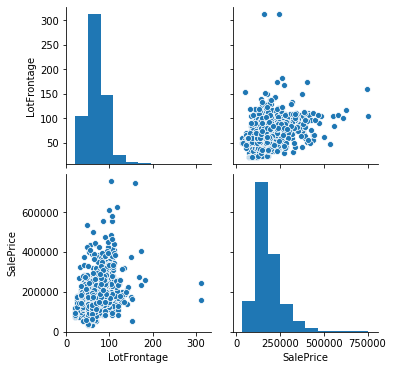

In [13]:
##### 2.Dealing with LotFrontage(Numerical Value)
data['LotFrontage'].value_counts(dropna=False)
# Visualize LotFrontage how important
#sns.pairplot(data,x_vars='LotFrontage',y_vars='SalePrice') 
sns.pairplot(data[['LotFrontage','SalePrice']])

In [14]:
## LotFrontage is important as it is having direct relation with Target. Replace column value with Median
data['LotFrontage'].fillna(data['LotFrontage'].median(),inplace=True)

In [15]:
##### 3.Dealing with GarageType,GarageFinish ,GarageQual, GarageCond (Categorical Value)
data['GarageType'].value_counts(dropna=False)
data['GarageFinish'].value_counts(dropna=False)
data['GarageQual'].value_counts(dropna=False)
data['GarageCond'].value_counts(dropna=False)
data['GarageYrBlt'].value_counts(dropna=False)
data.loc[data['GarageFinish'].isnull() ==True]    
# GarageFinish ,GarageType ,GarageYrBlt , GarageQual, GarageCond having equal null values. Fill all null values in this column
# with No Garage.
nulls =['GarageFinish','GarageType' , 'GarageQual', 'GarageCond']
for i in nulls:
    data[i].fillna('No Garage',inplace=True)
data['GarageYrBlt'].fillna(0,inplace=True)    #Its a numerical value

In [16]:
#### 4. Dealing with BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinType2 ,BsmtCond (Categorical)
data['BsmtQual'].value_counts(dropna=False)
data['BsmtExposure'].value_counts(dropna=False)
data['BsmtFinType1'].value_counts(dropna=False)
data['BsmtFinType2'].value_counts(dropna=False)
cols=['BsmtQual','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtCond']
for i in cols:
    data[i].fillna('No Basement',inplace=True)

In [17]:
#### 5.Deaing with remaining null values which has low percentage of null values
data.dropna(inplace=True)

## 3.Data Visualization

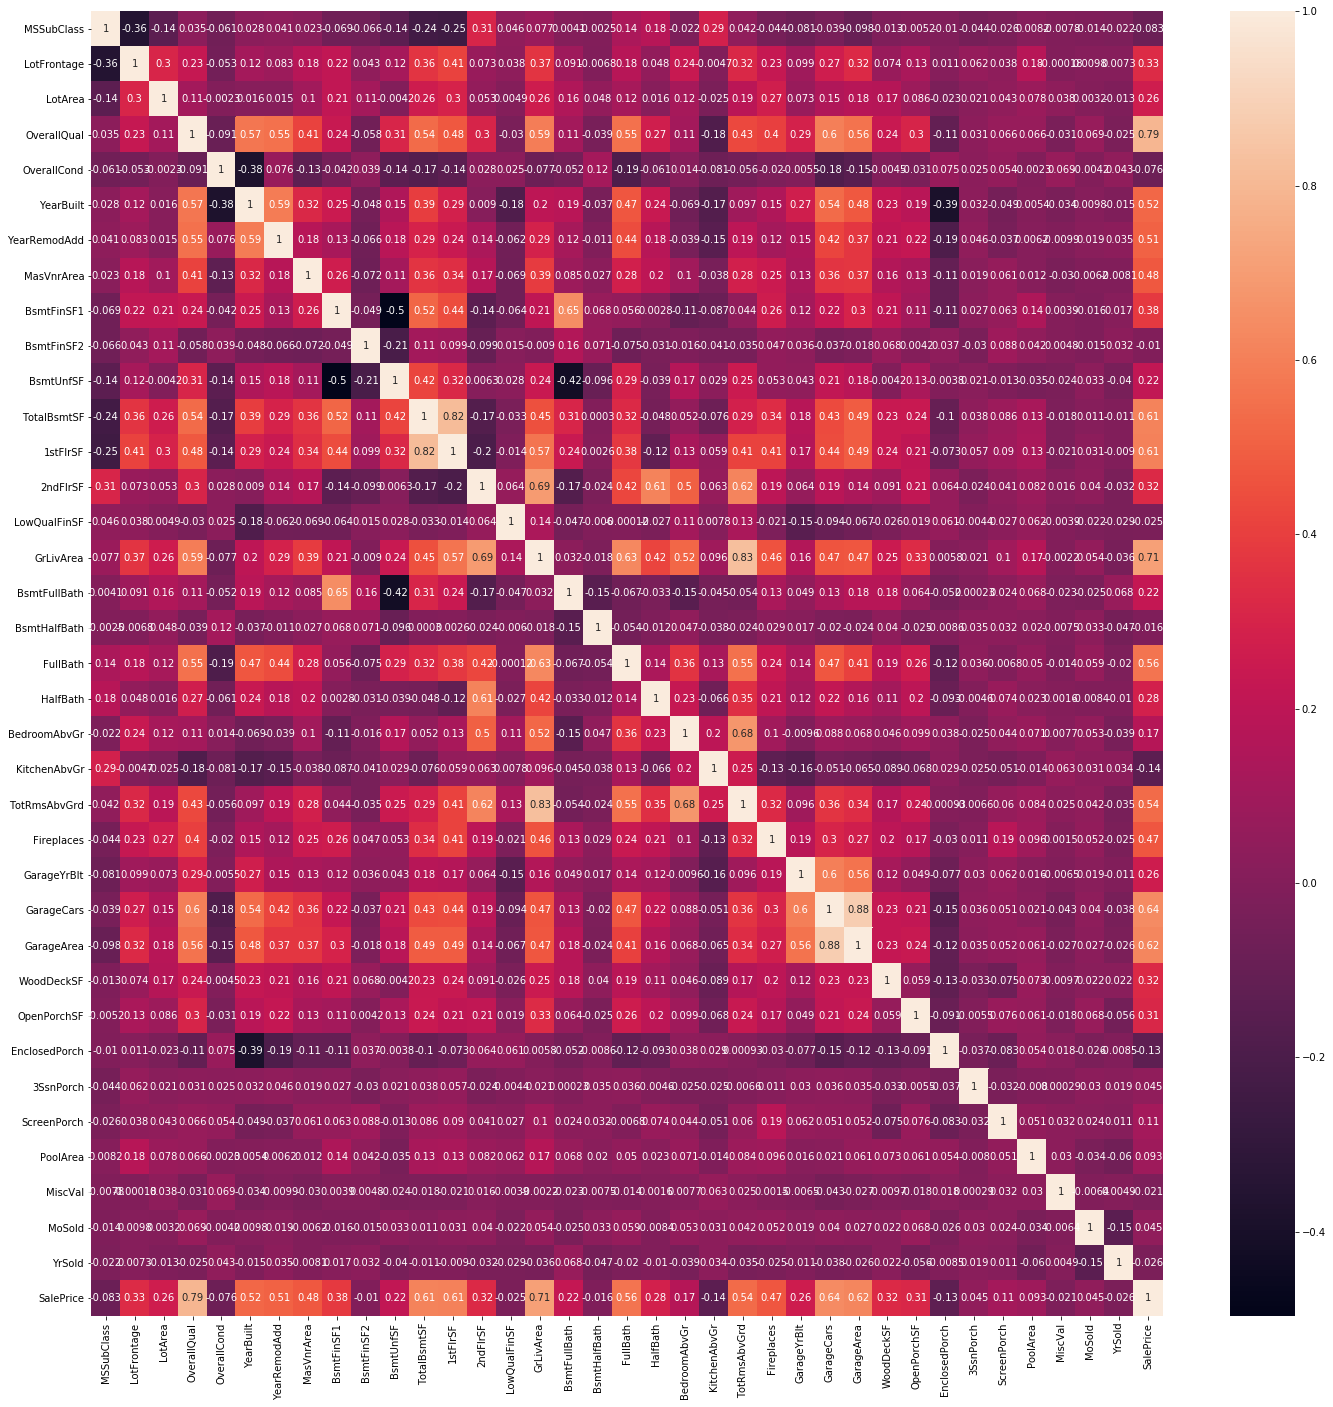

In [18]:
## Whole Data Visualization Using Heat map
plt.figure(figsize=(24,24))
sns.heatmap(data.corr(),annot=True)

In [19]:
## Finding more correlated Columns and remove it
corr_matrix=data.corr().abs()
upper_triangle=corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
cols_drop = [i for i in upper_triangle.columns if any (upper_triangle[i] > 0.80)]
cols_drop

['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea']

In [20]:
data.drop(cols_drop,axis=1,inplace=True)

In [21]:
#Dealing with Categorical values
cat =[]
num =[]
for i in data.columns:
    if data[i].dtype =='object':
        cat.append(i)
    else:
        num.append(i)

In [22]:
print(cat)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


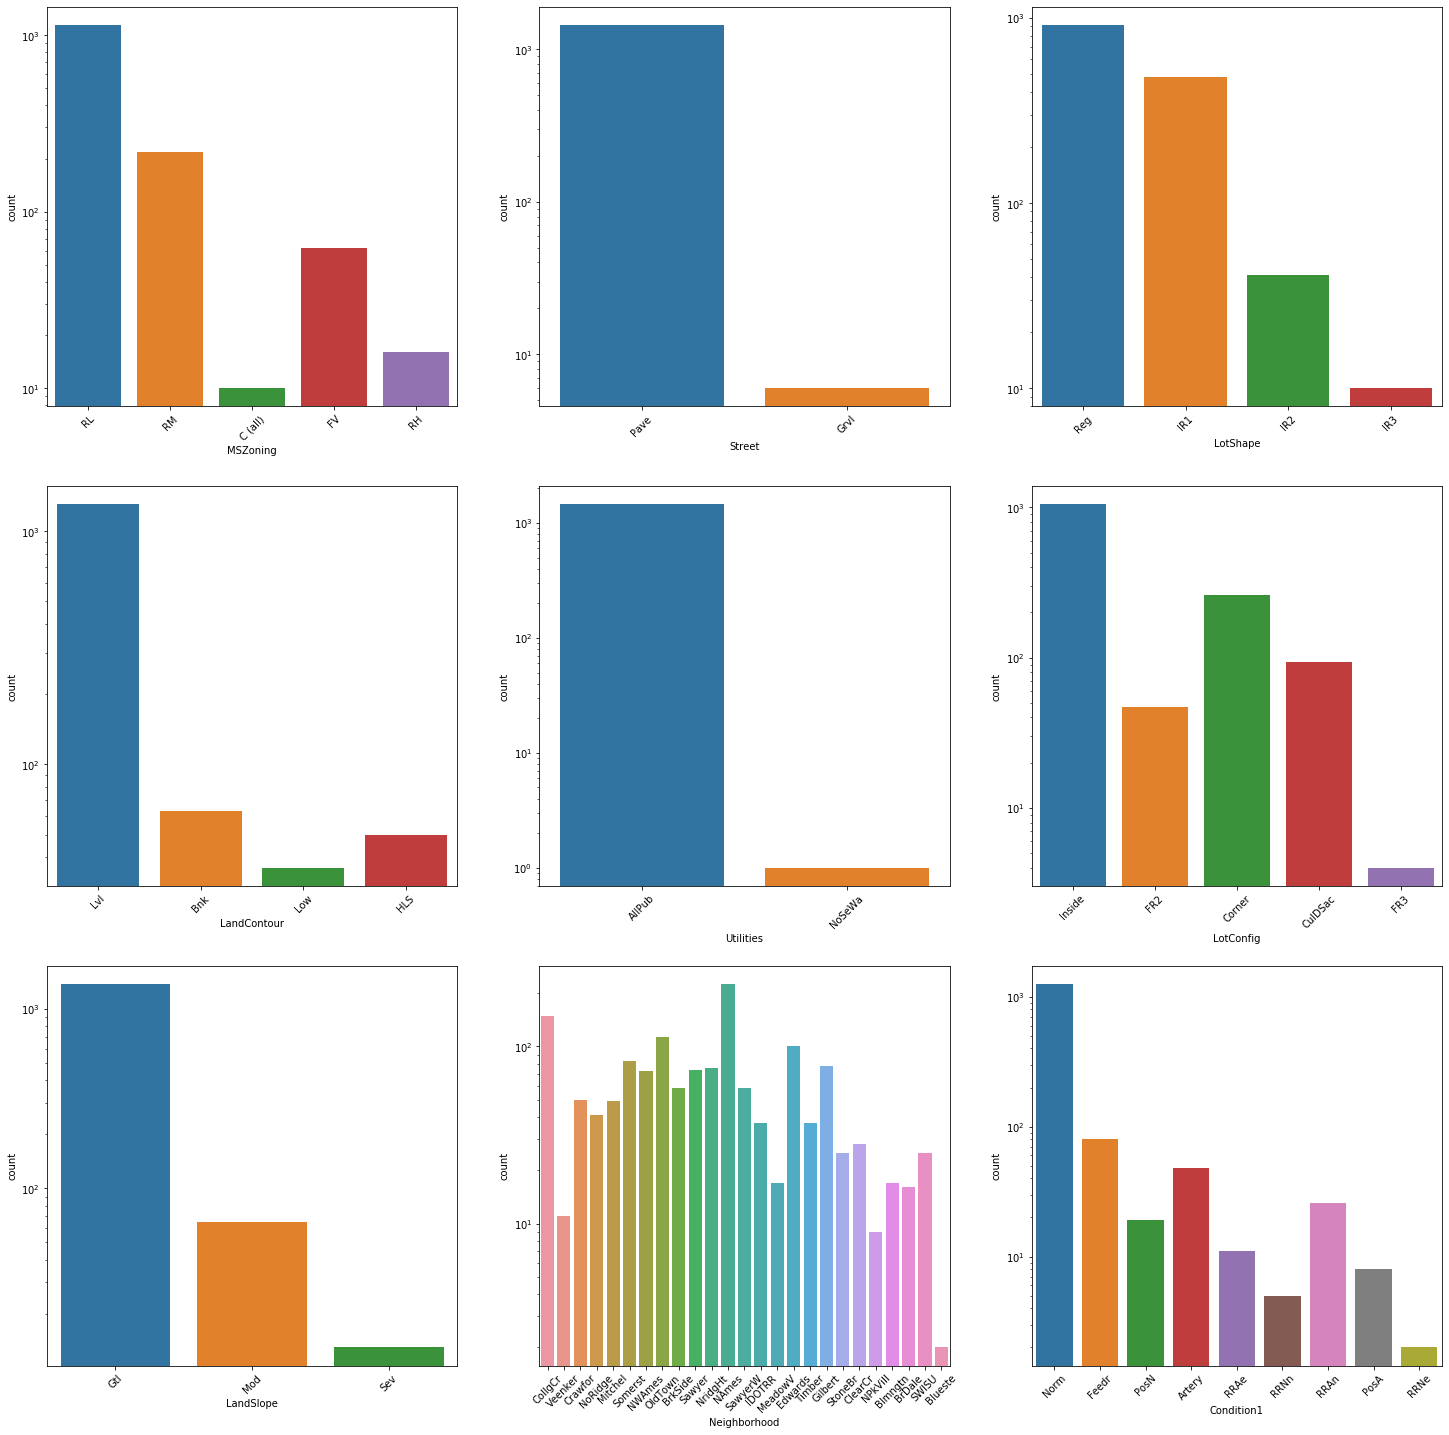

In [23]:
a=cat[0:9]
plt.figure(figsize=(25,25))
for i,j in enumerate(a):
    plt.subplot(3,3,i+1)
    sns.countplot(x=j,data=data)
    plt.yscale('log')
    plt.xticks(rotation=45)
plt.show()
    

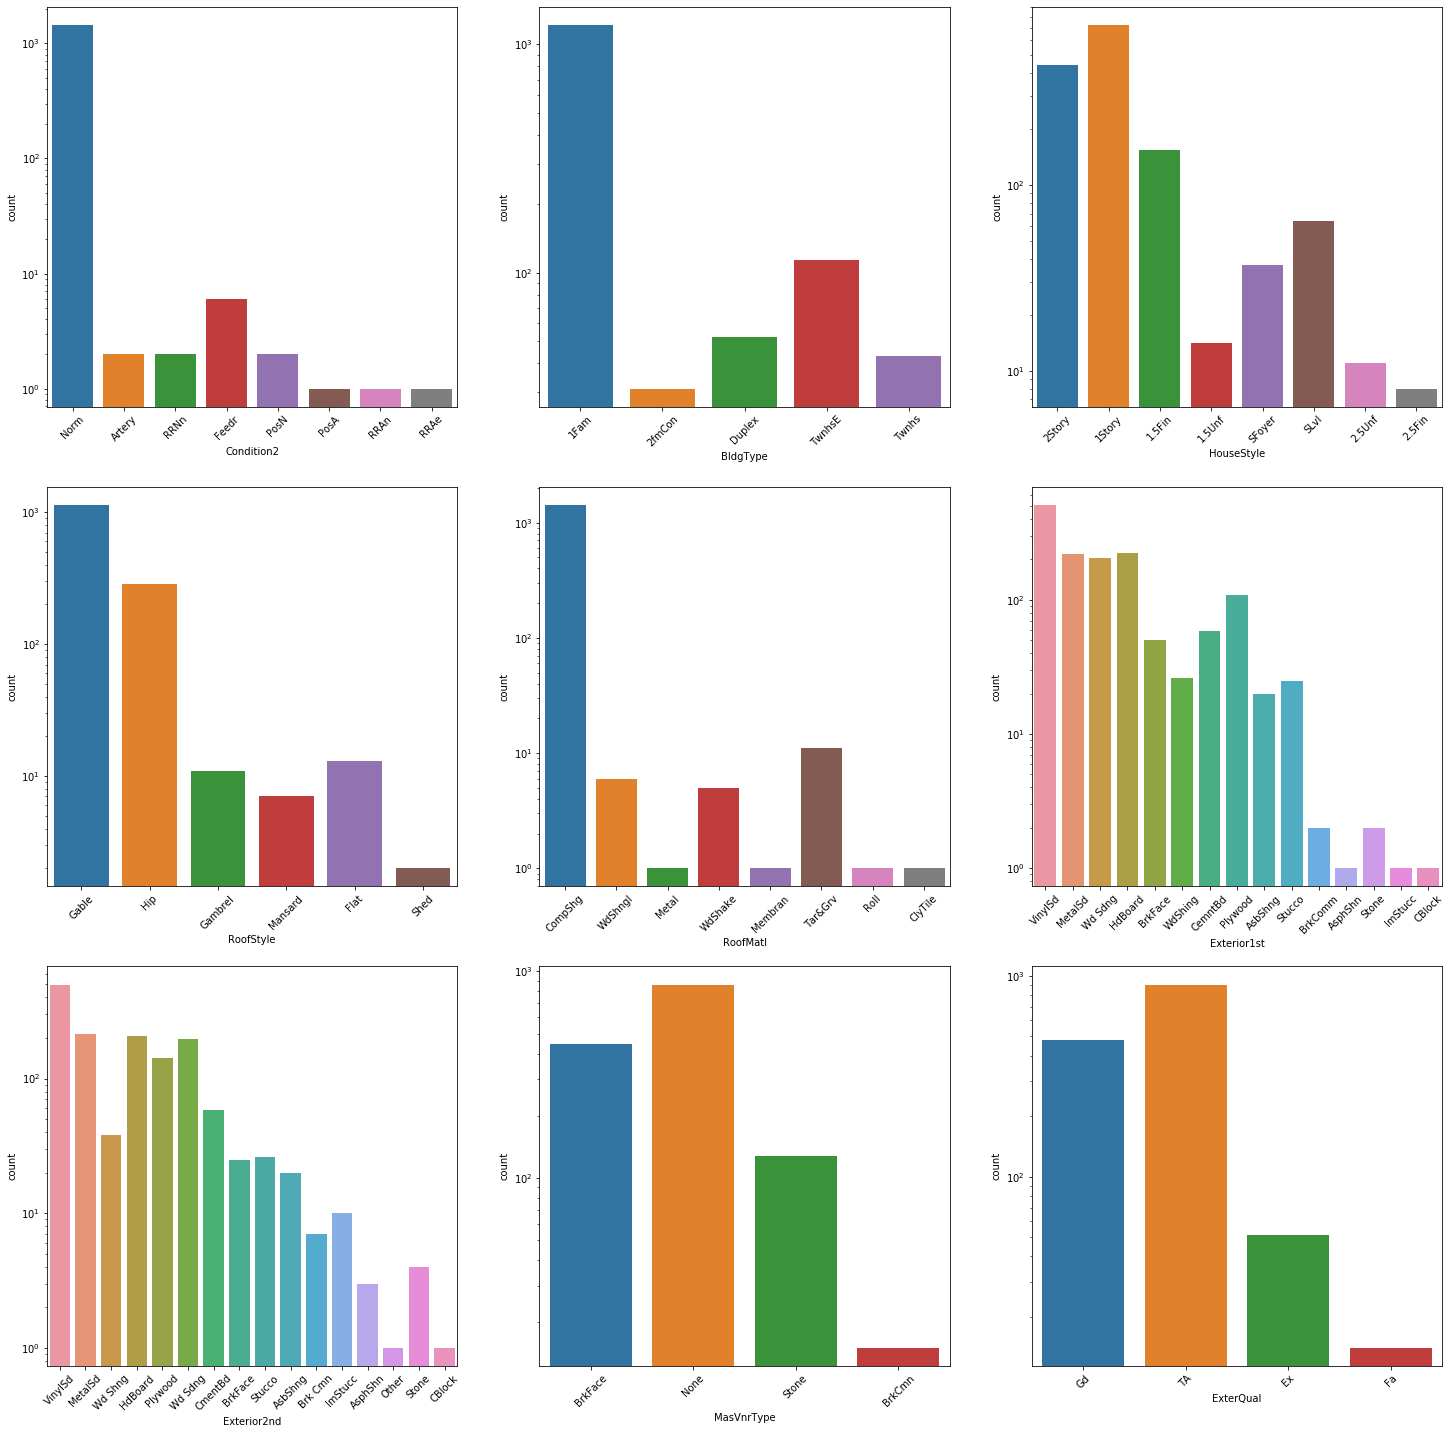

In [24]:
a=cat[9:18]
plt.figure(figsize=(25,25))
for i,j in enumerate(a):
    plt.subplot(3,3,i+1)
    sns.countplot(x=j,data=data)
    plt.yscale('log')
    plt.xticks(rotation=45)
plt.show()

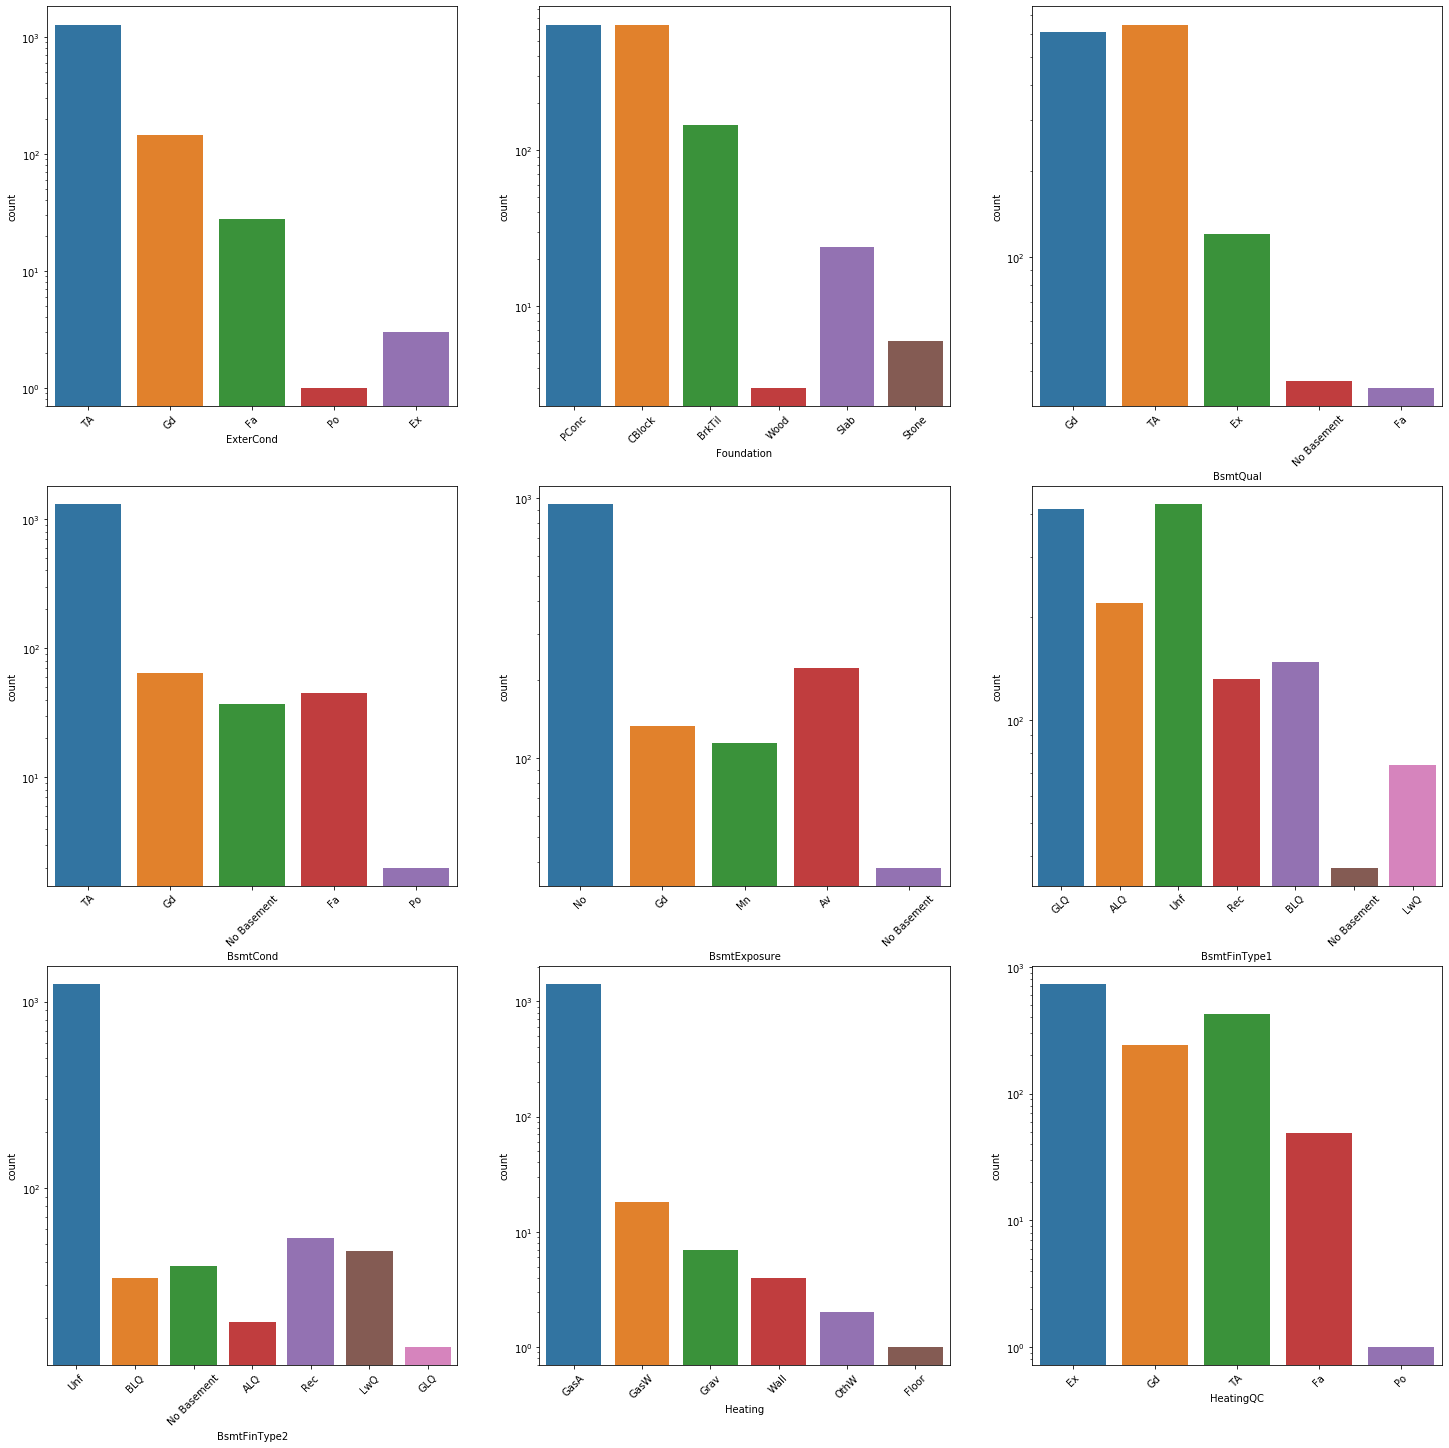

In [25]:
a=cat[18:27]
plt.figure(figsize=(25,25))
for i,j in enumerate(a):
    plt.subplot(3,3,i+1)
    sns.countplot(x=j,data=data)
    plt.yscale('log')
    plt.xticks(rotation=45)
plt.show()

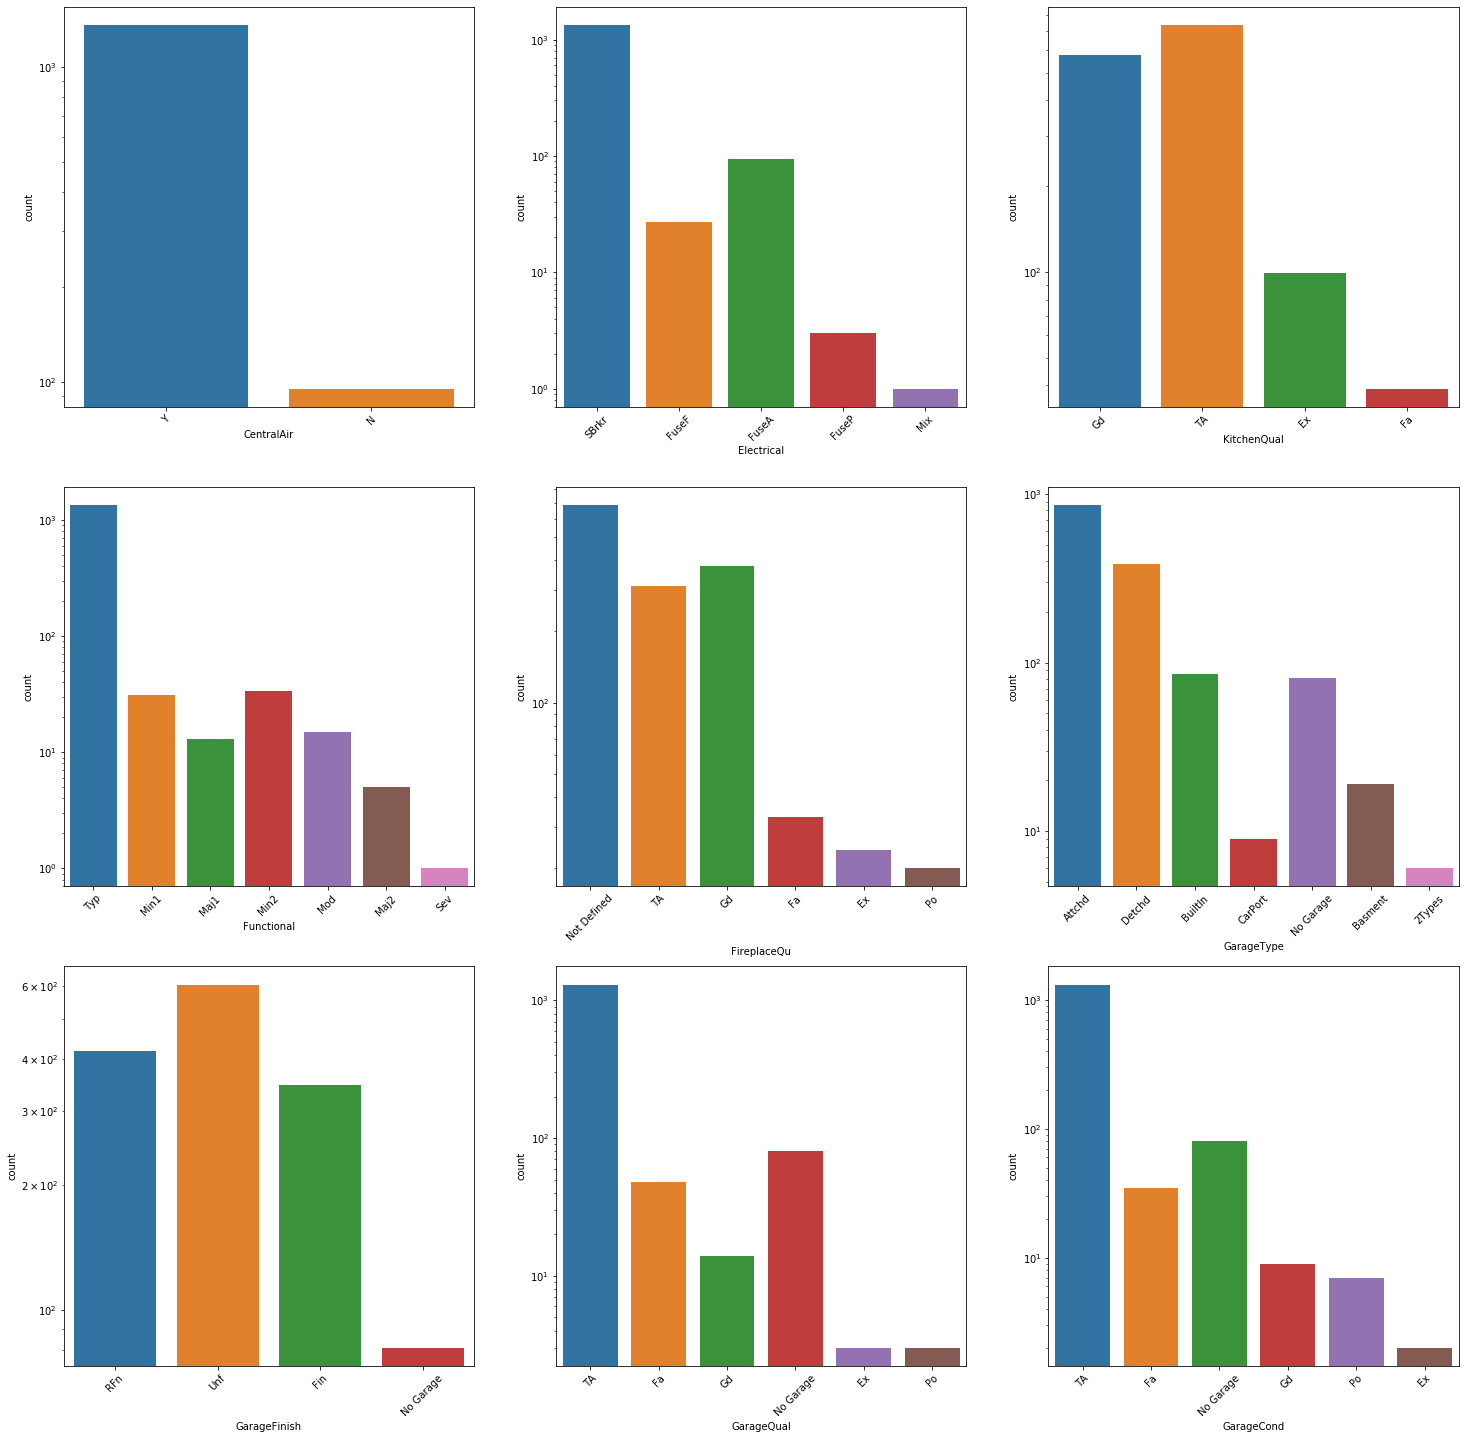

In [26]:
a=cat[27:36]
plt.figure(figsize=(25,25))
for i,j in enumerate(a):
    plt.subplot(3,3,i+1)
    sns.countplot(x=j,data=data)
    plt.yscale('log')
    plt.xticks(rotation=45)
plt.show()

In [27]:
## Remove columns with Skewed data
cols_drop=['Street','Utilities','CentralAir','Exterior1st', 'Exterior2nd']
data.drop(cols_drop,axis=1,inplace=True)

In [28]:
## Dealing with Numericals
print((num))

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


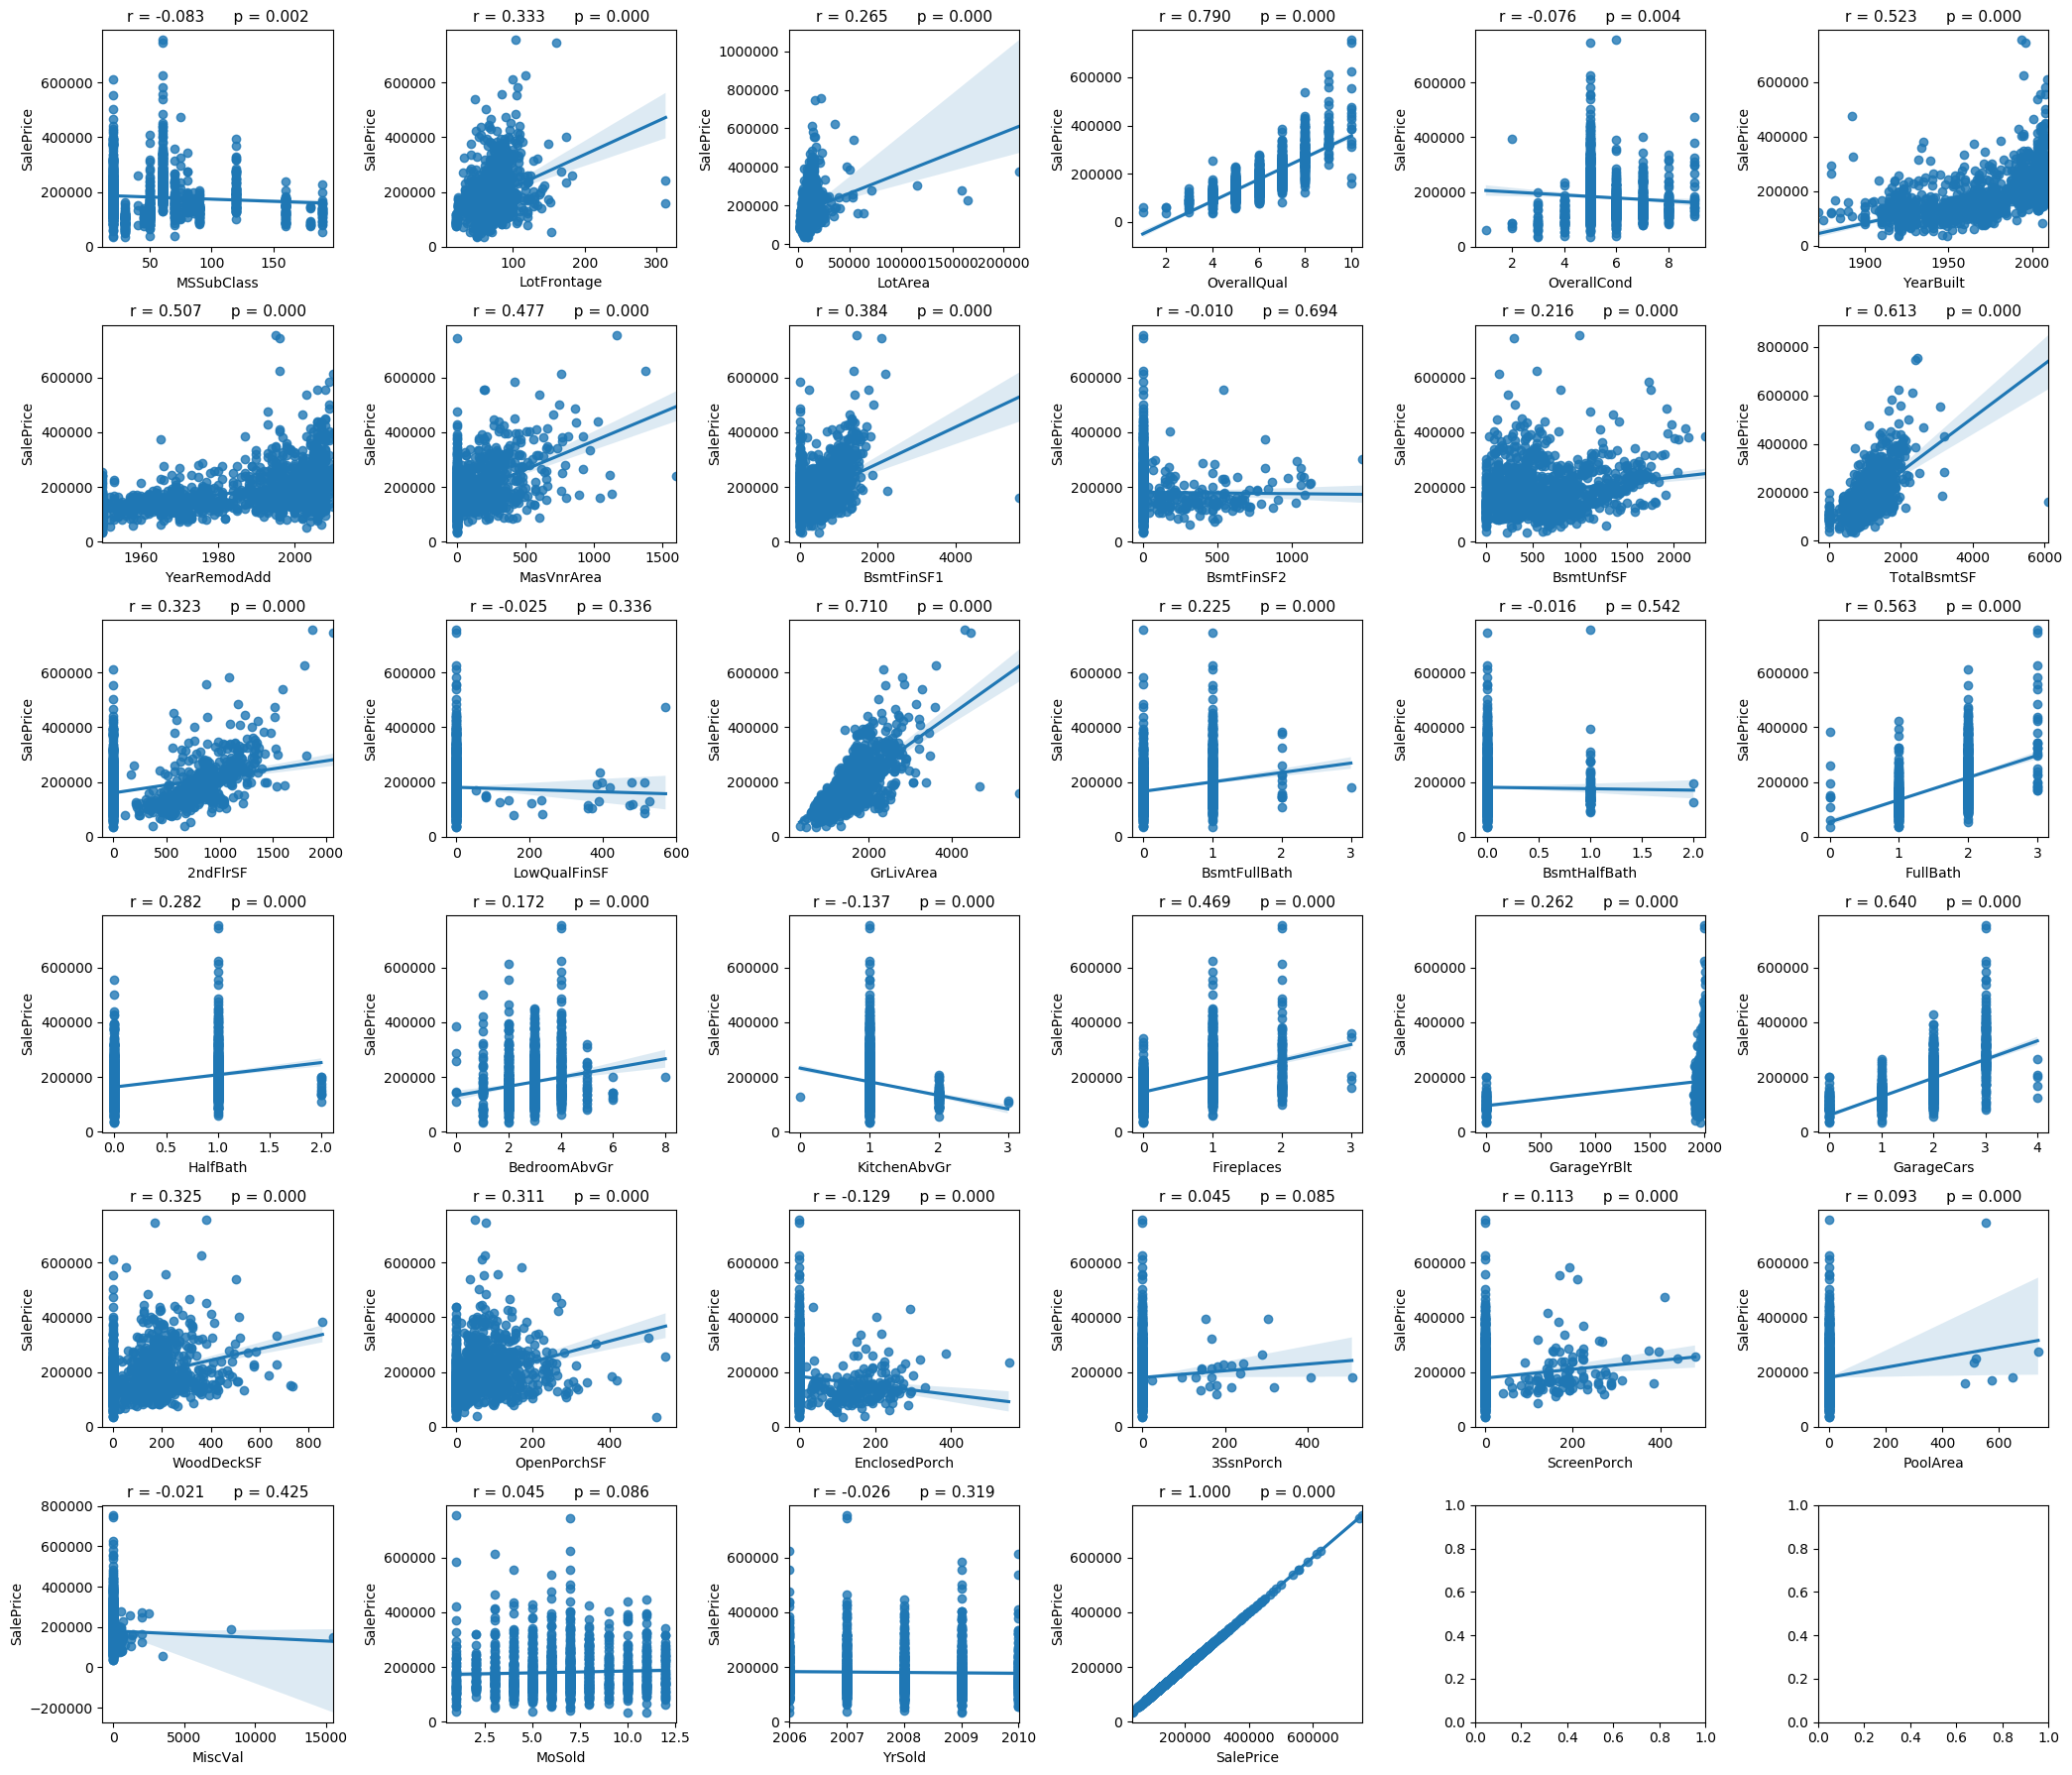

In [29]:
rows = 6
cols = 6
fig, axs = plt.subplots(rows,cols, figsize=(cols*3.5,rows*3),dpi=100)

for r in range(0,rows):
    for c in range(0,cols):  
        i = r*cols+c
        if i < len(num):
            sns.regplot(data[num[i]], data['SalePrice'], ax = axs[r][c])
            stp = stats.pearsonr(data[num[i]], data['SalePrice'])
            str_title = "r = " + "{0:.3f}".format(stp[0]) + "      " "p = " + "{0:.3f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
plt.show()

In [30]:
### Remove columns with high P-Values

In [31]:
cols_remove =['BsmtHalfBath','LowQualFinSF','BsmtFinSF2','3SsnPorch','MiscVal','MoSold','YrSold']

In [32]:
data.drop(cols_remove,axis=1,inplace=True)

In [33]:
## Outlier Treatment

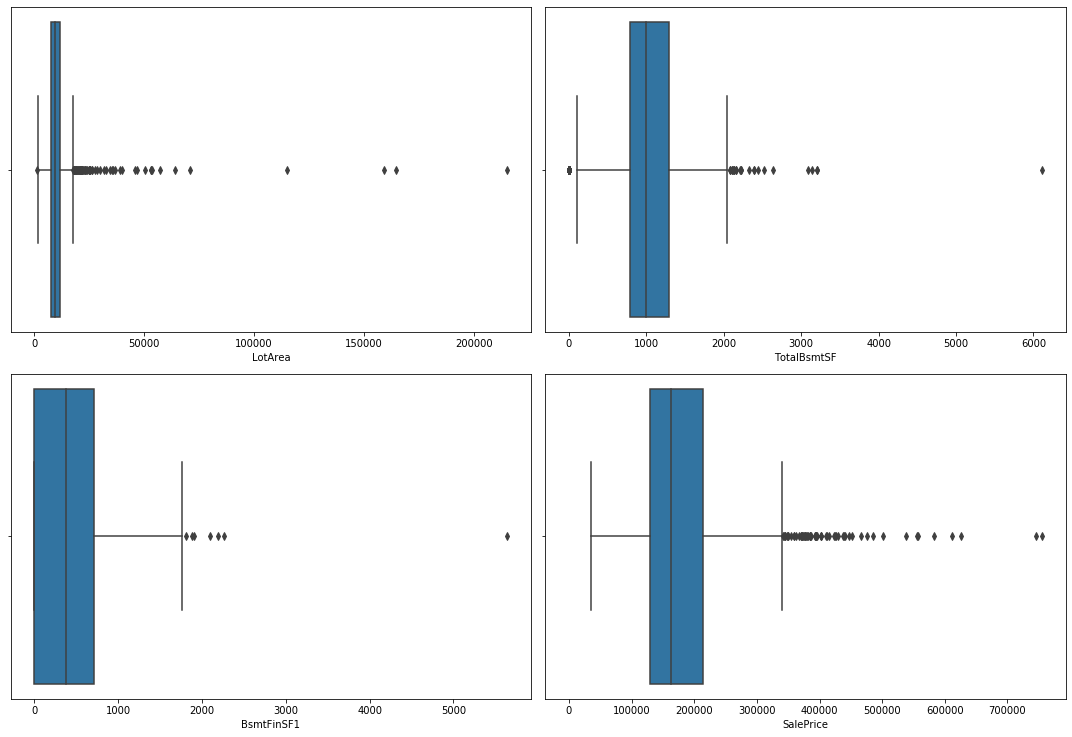

In [34]:
cols_outlier =['LotArea' ,'TotalBsmtSF','BsmtFinSF1','SalePrice']
plt.figure(figsize=(15,15))
for i,j in enumerate(cols_outlier):
    plt.subplot(3,2,i+1)
    sns.boxplot(data[j])
    plt.plot('log')
    plt.tight_layout()
plt.show()
    

In [35]:
Q1 = data['SalePrice'].quantile(0.05)
Q2 = data['SalePrice'].quantile(0.95)
IQR = Q2-Q1
data=data[(data['SalePrice'] >= (Q1-1.5*IQR)) & (data['SalePrice'] <= (Q2 + 1.5*IQR))]

In [36]:
Q1 = data['LotArea'].quantile(0.05)
Q2 = data['LotArea'].quantile(0.95)
IQR = Q2-Q1
data=data[(data['LotArea'] >= (Q1-1.5*IQR)) & (data['LotArea'] <= (Q2 + 1.5*IQR))]

In [37]:
Q1 = data['BsmtFinSF1'].quantile(0.05)
Q2 = data['BsmtFinSF1'].quantile(0.95)
IQR = Q2-Q1
data=data[(data['BsmtFinSF1'] >= (Q1-1.5*IQR)) & (data['BsmtFinSF1'] <= (Q2 + 1.5*IQR))]

In [38]:
# Calculating percentage of data lost because of outlier treatment
(1460-(data.shape[0]))/1460*100

1.7808219178082192

In [39]:
##Feature Engineering -Numerical Values
data.head(10)

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
0          60       RL         65.0     8450      Reg         Lvl    Inside   
1          20       RL         80.0     9600      Reg         Lvl       FR2   
2          60       RL         68.0    11250      IR1         Lvl    Inside   
3          70       RL         60.0     9550      IR1         Lvl    Corner   
4          60       RL         84.0    14260      IR1         Lvl       FR2   
5          50       RL         85.0    14115      IR1         Lvl    Inside   
6          20       RL         75.0    10084      Reg         Lvl    Inside   
7          60       RL         69.0    10382      IR1         Lvl    Corner   
8          50       RM         51.0     6120      Reg         Lvl    Inside   
9         190       RL         50.0     7420      Reg         Lvl    Corner   

  LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       Gtl      NoRidge       Norm       Norm     1Fam     2Story   
5       Gtl      Mitchel       Norm       Norm     1Fam     1.5Fin   
6       Gtl      Somerst       Norm       Norm     1Fam     1Story   
7       Gtl       NWAmes       PosN       Norm     1Fam     2Story   
8       Gtl      OldTown     Artery       Norm     1Fam     1.5Fin   
9       Gtl      BrkSide     Artery     Artery   2fmCon     1.5Unf   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0            7            5       2003          2003     Gable  CompShg   
1            6            8       1976          1976     Gable  CompShg   
2            7            5       2001          2002     Gable  CompShg   
3            7            5       1915          1970     Gable  CompShg   
4            8            5       2000          2000     Gable  CompShg   
5            5            5       1993          1995     Gable  CompShg   
6            8            5       2004          2005     Gable  CompShg   
7            7            6       1973          1973     Gable  CompShg   
8            7            5       1931          1950     Gable  CompShg   
9            5            6       1939          1950     Gable  CompShg   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0    BrkFace       196.0        Gd        TA      PConc       Gd       TA   
1       None         0.0        TA        TA     CBlock       Gd       TA   
2    BrkFace       162.0        Gd        TA      PConc       Gd       TA   
3       None         0.0        TA        TA     BrkTil       TA       Gd   
4    BrkFace       350.0        Gd        TA      PConc       Gd       TA   
5       None         0.0        TA        TA       Wood       Gd       TA   
6      Stone       186.0        Gd        TA      PConc       Ex       TA   
7      Stone       240.0        TA        TA     CBlock       Gd       TA   
8       None         0.0        TA        TA     BrkTil       TA       TA   
9       None         0.0        TA        TA     BrkTil       TA       TA   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtUnfSF  TotalBsmtSF  \
0           No          GLQ         706          Unf        150          856   
1           Gd          ALQ         978          Unf        284         1262   
2           Mn          GLQ         486          Unf        434          920   
3           No          ALQ         216          Unf        540          756   
4           Av          GLQ         655          Unf        490         1145   
5           No          GLQ         732          Unf         64          796   
6           Av          GLQ        1369          Unf        317         1686   
7           Mn          ALQ         859         

In [40]:
##  Adding new column total SF ( sum of basement and 2nd floor sf)
data['TotalSF']   =data['TotalBsmtSF']+data['2ndFlrSF']

In [41]:
## calculating years from todays date when house  builded 
data['House_age']  =pd.datetime.now().year -data['YearBuilt']
data['Remodelled'] =pd.datetime.now().year - data['YearRemodAdd']
data['GarageYrBlt_Age'] = data['GarageYrBlt'].apply(lambda x: 0 if x==0 else pd.datetime.now().year - x)


In [42]:
data.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','TotalBsmtSF'], axis=1, inplace=True)

In [43]:
data.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
0          60       RL         65.0     8450      Reg         Lvl    Inside   
1          20       RL         80.0     9600      Reg         Lvl       FR2   
2          60       RL         68.0    11250      IR1         Lvl    Inside   
3          70       RL         60.0     9550      IR1         Lvl    Corner   
4          60       RL         84.0    14260      IR1         Lvl       FR2   

  LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond RoofStyle RoofMatl MasVnrType  MasVnrArea  \
0            7            5     Gable  CompShg    BrkFace       196.0   
1            6            8     Gable  CompShg       None         0.0   
2            7            5     Gable  CompShg    BrkFace       162.0   
3            7            5     Gable  CompShg       None         0.0   
4            8            5     Gable  CompShg    BrkFace       350.0   

  ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0        Gd        TA      PConc       Gd       TA           No          GLQ   
1        TA        TA     CBlock       Gd       TA           Gd          ALQ   
2        Gd        TA      PConc       Gd       TA           Mn          GLQ   
3        TA        TA     BrkTil       TA       Gd           No          ALQ   
4        Gd        TA      PConc       Gd       TA           Av          GLQ   

   BsmtFinSF1 BsmtFinType2  BsmtUnfSF Heating HeatingQC Electrical  2ndFlrSF  \
0         706          Unf        150    GasA        Ex      SBrkr       854   
1         978          Unf        284    GasA        Ex      SBrkr         0   
2         486          Unf        434    GasA        Ex      SBrkr       866   
3         216          Unf        540    GasA        Gd      SBrkr       756   
4         655          Unf        490    GasA        Ex      SBrkr      1053   

   GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0       1710             1         2         1             3             1   
1       1262             0         2         0             3             1   
2       1786             1         2         1             3             1   
3       1717             1         1         0             3             1   
4       2198             1         2         1             4             1   

  KitchenQual Functional  Fireplaces  FireplaceQu GarageType GarageFinish  \
0          Gd        Typ           0  Not Defined     Attchd          RFn   
1          TA        Typ           1           TA     Attchd          RFn   
2          Gd        Typ           1           TA     Attchd          RFn   
3          Gd        Typ           1           Gd     Detchd          Unf   
4          Gd        Typ           1           TA     Attchd          RFn   

   GarageCars GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  \
0           2         TA         TA          Y           0           61   
1           2         TA         TA          Y         298            0   
2           2         TA         TA          Y           0           42   
3           3         TA         TA          Y           0           35   
4           3         TA         TA          Y         192           84   

   EnclosedPorch  ScreenPorch  PoolArea SaleType SaleCondition  SalePrice  \
0              0            0         0       WD        Normal     208500   
1              0            0         0       WD        Normal     181500   
2              0            0         0       WD        Normal     223500   
3            27

In [44]:
##Label encoding for categorical data
cate=[]
nume=[]
for i in data.columns:
    if data[i].dtype =='object':
        cate.append(i)
    else:
        nume.append(i)
        
le =LabelEncoder()

for i in range(0,34):
    a=cate[i]
    data[a]=le.fit_transform(data[a])
    

## Train_Test_Split

In [45]:
df_train,df_test = train_test_split(data,train_size=0.70,test_size=0.30,random_state=100)

In [46]:
## Standardizing values as each column value in differnt formats
sc =StandardScaler()
cols = df_train.columns
df_train[cols] = sc.fit_transform(df_train[cols])
df_test[cols] = sc.transform(df_test[cols])

In [47]:
y_train = df_train.pop('SalePrice')
y_test  = df_test.pop('SalePrice')
X_train = df_train
X_test  = df_test

## Building Different Models

### 1.Linear Regression model

In [48]:
## Usinf P value and VIF , Visualizing features and building Linear Regression Model  

In [49]:
X_train_fst = sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_fst)
lm = lr.fit()
lm.params
lm.summary()   

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     139.4
Date:                Fri, 23 Oct 2020   Prob (F-statistic):               0.00
Time:                        19:55:48   Log-Likelihood:                -274.65
No. Observations:                1003   AIC:                             671.3
Df Residuals:                     942   BIC:                             970.8
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.076e-16      0.010   1.04e-14      1.000      -0.020       0.020
MSSubClass         -0.0387      0.025     -1.568      0.117      -0.087       0.010
MSZoning           -0.0115      0.012     -0.968      0.333      -0.035       0.012
LotFrontage         0.0043      0.014      0.307      0.759      -0.023       0.032
LotArea             0.0596      0.015      3.982      0.000       0.030       0.089
LotShape           -0.0108      0.012     -0.922      0.357      -0.034       0.012
LandContour         0.0038      0.012      0.317      0.751      -0.020       0.027
LotConfig           0.0149      0.011      1.331      0.184      -0.007       0.037
LandSlope           0.0032      0.012      0.260      0.795      -0.021       0.027
Neighborhood       -0.0079      0.012     -0.684      0.494      -0.030       0.015
Condition1         -0.0146      0.011     -1.333      0.183      -0.036       0.007
Condition2         -0.0119      0.011     -1.092      0.275      -0.033       0.009
BldgType           -0.0292      0.024     -1.215      0.225      -0.076       0.018
HouseStyle          0.0142      0.015      0.920      0.358      -0.016       0.045
OverallQual         0.1577      0.020      7.706      0.000       0.118       0.198
OverallCond         0.0822      0.014      5.681      0.000       0.054       0.111
RoofStyle           0.0198      0.012      1.713      0.087      -0.003       0.043
RoofMatl           -0.0161      0.011     -1.409      0.159      -0.039       0.006
MasVnrType          0.0778      0.012      6.342      0.000       0.054       0.102
MasVnrArea          0.0691      0.013      5.195      0.000       0.043       0.095
ExterQual          -0.0840      0.017     -5.071      0.000      -0.117      -0.052
ExterCond           0.0090      0.012      0.776      0.438      -0.014       0.032
Foundation          0.0064      0.015      0.424      0.672      -0.023       0.036
BsmtQual           -0.0534      0.016     -3.315      0.001      -0.085      -0.022
BsmtCond            0.0078      0.011      0.684      0.494      -0.015       0.030
BsmtExposure       -0.0315      0.013     -2.476      0.013      -0.056      -0.007
BsmtFinType1        0.0128      0.015      0.868      0.386      -0.016       0.042
BsmtFinSF1          0.1118      0.046      2.431      0.015       0.022       0.202
BsmtFinType2       -0.0173      0.016     -1.073      0.283      -0.049       0.014
BsmtUnfSF           0.0059      0.050      0.118      0.906      -0.092       0.104
Heating            -0.0164      0.011     -1.485      0.138      -0.038       0.005
HeatingQC          -0.0142      0.013     -1.052      0.293      -0.041       0.012
Electrical         -0.0036      0.012     -0.300      0.764      -0.027       0.020
2ndFlrSF           -0.1356      0.050     -2.739      0.006

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif =pd.DataFrame()
vif['feature']=X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values ,i) for i in range(X_train.shape[1])]
vif['VIF'] =round(vif['VIF'],2)
vif.sort_values(ascending=False,by='VIF')

feature    VIF
56          TotalSF  31.19
28        BsmtUnfSF  23.38
32         2ndFlrSF  22.82
26       BsmtFinSF1  19.68
33        GrLivArea   9.80
57        House_age   7.88
0        MSSubClass   5.67
11         BldgType   5.36
13      OverallQual   3.90
35         FullBath   3.27
58       Remodelled   2.84
59  GarageYrBlt_Age   2.82
19        ExterQual   2.55
45       GarageCars   2.46
27     BsmtFinType2   2.43
36         HalfBath   2.42
22         BsmtQual   2.41
12       HouseStyle   2.23
46       GarageQual   2.19
47       GarageCond   2.17
37     BedroomAbvGr   2.14
43       GarageType   2.11
21       Foundation   2.10
3           LotArea   2.09
39      KitchenQual   2.08
34     BsmtFullBath   2.02
25     BsmtFinType1   2.01
14      OverallCond   1.95
2       LotFrontage   1.81
44     GarageFinish   1.73
41       Fireplaces   1.70
30        HeatingQC   1.69
18       MasVnrArea   1.65
24     BsmtExposure   1.51
38     KitchenAbvGr   1.50
48       PavedDrive   1.49
17       MasVnrType   1.40
7         LandSlope   1.38
51    EnclosedPorch   1.36
31       Electrical   1.36
5       LandContour   1.32
1          MSZoning   1.31
49       WoodDeckSF   1.30
55    SaleCondition   1.28
4          LotShape   1.28
50      OpenPorchSF   1.27
42      FireplaceQu   1.26
15        RoofStyle   1.25
20        ExterCond   1.25
8      Neighborhood   1.23
16         RoofMatl   1.22
40       Functional   1.22
23         BsmtCond   1.22
54         SaleType   1.21
52      ScreenPorch   1.17
6         LotConfig   1.16
29          Heating   1.14
9        Condition1   1.12
53         PoolArea   1.10
10       Condition2   1.10

In [51]:
## Removing columns with more P values
cols_drop =['LotShape','LotConfig','LandSlope','Neighborhood','Heating','HeatingQC','GarageFinish','GarageQual','OpenPorchSF','Remodelled','GarageYrBlt_Age','BsmtFullBath']

In [52]:
X_Linear_train = X_train.copy()

In [53]:
X_Linear_train.drop(cols_drop,inplace=True,axis=1)

In [54]:
cols_drop2=['HalfBath','FullBath', 'Electrical', 'BsmtFinType1' ,'RoofStyle','BsmtUnfSF','Condition1','BldgType','EnclosedPorch','HouseStyle','ExterCond']

In [55]:
X_Linear_train.drop(cols_drop2,inplace=True,axis=1)

In [56]:
X_Linear_train_fst = sm.add_constant(X_Linear_train)
lr=sm.OLS(y_train,X_Linear_train_fst)
lm = lr.fit()
lm.params
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     225.5
Date:                Fri, 23 Oct 2020   Prob (F-statistic):               0.00
Time:                        19:55:52   Log-Likelihood:                -286.51
No. Observations:                1003   AIC:                             649.0
Df Residuals:                     965   BIC:                             835.6
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.804e-16      0.010  -1.74e-14      1.000      -0.020       0.020
MSSubClass       -0.0593      0.014     -4.309      0.000      -0.086      -0.032
MSZoning         -0.0139      0.011     -1.231      0.218      -0.036       0.008
LotFrontage       0.0056      0.013      0.419      0.675      -0.021       0.032
LotArea           0.0660      0.014      4.730      0.000       0.039       0.093
LandContour       0.0024      0.011      0.220      0.826      -0.019       0.024
Condition2       -0.0143      0.011     -1.345      0.179      -0.035       0.007
OverallQual       0.1615      0.020      8.204      0.000       0.123       0.200
OverallCond       0.0888      0.012      7.127      0.000       0.064       0.113
RoofMatl         -0.0139      0.011     -1.247      0.213      -0.036       0.008
MasVnrType        0.0762      0.012      6.328      0.000       0.053       0.100
MasVnrArea        0.0730      0.013      5.637      0.000       0.048       0.098
ExterQual        -0.0892      0.016     -5.553      0.000      -0.121      -0.058
Foundation        0.0104      0.015      0.718      0.473      -0.018       0.039
BsmtQual         -0.0576      0.016     -3.674      0.000      -0.088      -0.027
BsmtCond          0.0098      0.011      0.896      0.370      -0.012       0.031
BsmtExposure     -0.0385      0.012     -3.221      0.001      -0.062      -0.015
BsmtFinSF1        0.1109      0.012      8.960      0.000       0.087       0.135
BsmtFinType2     -0.0145      0.011     -1.338      0.181      -0.036       0.007
2ndFlrSF         -0.1215      0.019     -6.324      0.000      -0.159      -0.084
GrLivArea         0.4204      0.031     13.691      0.000       0.360       0.481
BedroomAbvGr     -0.0534      0.014     -3.723      0.000      -0.082      -0.025
KitchenAbvGr     -0.0405      0.012     -3.331      0.001      -0.064      -0.017
KitchenQual      -0.0911      0.015     -6.279      0.000      -0.120      -0.063
Functional        0.0508      0.011      4.522      0.000       0.029       0.073
Fireplaces        0.0332      0.013      2.531      0.012       0.007       0.059
FireplaceQu      -0.0263      0.011     -2.315      0.021      -0.049      -0.004
GarageType        0.0559      0.014      3.892      0.000       0.028       0.084
GarageCars        0.0580      0.016      3.714      0.000       0.027       0.089
GarageCond       -0.0073      0.012     -0.588      0.557      -0.032       0.017
PavedDrive        0.0193      0.012      1.557      0.120      -0.005       0.044
WoodDeckSF        0.0110      0.012      0.950      0.342      -0.012       0.034
ScreenPorch       0.0289      0.011      2.632      0.009       0.007       0.050
PoolArea         -0.0019      0.011     -0.179      0.858      -0.023       0.019
SaleType         -0.0194      0.011     -1.726   

In [57]:
vif =pd.DataFrame()
vif['feature']=X_Linear_train.columns
vif['VIF'] = [variance_inflation_factor(X_Linear_train.values ,i) for i in range(X_Linear_train.shape[1])]
vif['VIF'] =round(vif['VIF'],2)
vif.sort_values(ascending=False,by='VIF')

feature   VIF
19      GrLivArea  8.77
35        TotalSF  6.74
36      House_age  4.27
6     OverallQual  3.61
18       2ndFlrSF  3.44
11      ExterQual  2.40
13       BsmtQual  2.29
27     GarageCars  2.27
22    KitchenQual  1.96
12     Foundation  1.96
26     GarageType  1.92
20   BedroomAbvGr  1.91
3         LotArea  1.81
0      MSSubClass  1.76
2     LotFrontage  1.67
24     Fireplaces  1.60
10     MasVnrArea  1.56
7     OverallCond  1.45
28     GarageCond  1.44
29     PavedDrive  1.43
16     BsmtFinSF1  1.43
21   KitchenAbvGr  1.38
9      MasVnrType  1.35
15   BsmtExposure  1.33
30     WoodDeckSF  1.25
34  SaleCondition  1.23
25    FireplaceQu  1.20
1        MSZoning  1.19
23     Functional  1.18
33       SaleType  1.17
8        RoofMatl  1.15
14       BsmtCond  1.12
31    ScreenPorch  1.12
4     LandContour  1.10
17   BsmtFinType2  1.09
32       PoolArea  1.07
5      Condition2  1.05

In [58]:
cols_drop3 =['GrLivArea','Condition2','GarageCond','PoolArea','LotFrontage','PavedDrive','WoodDeckSF','LandContour']

In [59]:
X_Linear_train.drop(cols_drop3,inplace=True,axis=1)

In [60]:
X_Linear_train_fst = sm.add_constant(X_Linear_train)
lr=sm.OLS(y_train,X_Linear_train_fst)
lm = lr.fit()
lm.params
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     234.5
Date:                Fri, 23 Oct 2020   Prob (F-statistic):               0.00
Time:                        19:55:52   Log-Likelihood:                -381.07
No. Observations:                1003   AIC:                             822.1
Df Residuals:                     973   BIC:                             969.5
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.151e-16      0.011    1.9e-14      1.000      -0.022       0.022
MSSubClass       -0.0644      0.014     -4.512      0.000      -0.092      -0.036
MSZoning         -0.0160      0.012     -1.300      0.194      -0.040       0.008
LotArea           0.0972      0.014      6.761      0.000       0.069       0.125
OverallQual       0.2043      0.021      9.683      0.000       0.163       0.246
OverallCond       0.1036      0.013      7.732      0.000       0.077       0.130
RoofMatl          0.0198      0.012      1.678      0.094      -0.003       0.043
MasVnrType        0.0658      0.013      5.017      0.000       0.040       0.091
MasVnrArea        0.0849      0.014      6.023      0.000       0.057       0.113
ExterQual        -0.0880      0.018     -5.025      0.000      -0.122      -0.054
Foundation        0.0463      0.015      2.988      0.003       0.016       0.077
BsmtQual         -0.0842      0.017     -5.045      0.000      -0.117      -0.051
BsmtCond         -0.0030      0.012     -0.253      0.800      -0.026       0.020
BsmtExposure     -0.0290      0.013     -2.250      0.025      -0.054      -0.004
BsmtFinSF1        0.1178      0.013      8.735      0.000       0.091       0.144
BsmtFinType2     -0.0282      0.012     -2.405      0.016      -0.051      -0.005
2ndFlrSF         -0.0387      0.020     -1.942      0.052      -0.078       0.000
BedroomAbvGr      0.0023      0.015      0.153      0.878      -0.027       0.032
KitchenAbvGr     -0.0026      0.013     -0.207      0.836      -0.028       0.022
KitchenQual      -0.1082      0.016     -6.895      0.000      -0.139      -0.077
Functional        0.0116      0.012      0.981      0.327      -0.012       0.035
Fireplaces        0.0787      0.014      5.685      0.000       0.052       0.106
FireplaceQu      -0.0227      0.012     -1.839      0.066      -0.047       0.002
GarageType        0.0458      0.015      2.999      0.003       0.016       0.076
GarageCars        0.0869      0.016      5.310      0.000       0.055       0.119
ScreenPorch       0.0244      0.012      2.061      0.040       0.001       0.048
SaleType         -0.0350      0.012     -2.874      0.004      -0.059      -0.011
SaleCondition     0.0535      0.013      4.260      0.000       0.029       0.078
TotalSF           0.3478      0.024     14.587      0.000       0.301       0.395
House_age        -0.0717      0.021     -3.370      0.001      -0.114      -0.030
==============================================================================
Omnibus:                      317.155   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2481.303
Skew:                           1.227   Prob(JB):                         0.00
Kurtosis:                      10.304   Cond. No.            

In [61]:
cols_drop4=['MSZoning','RoofMatl','BsmtCond','BsmtExposure','2ndFlrSF','FireplaceQu','House_age','BedroomAbvGr','KitchenAbvGr','Functional','GarageType','ScreenPorch','BsmtFinType2','SaleType']


In [62]:
X_Linear_train.drop(cols_drop4,inplace=True,axis=1)

In [63]:
X_Linear_train_fst = sm.add_constant(X_Linear_train)
lr=sm.OLS(y_train,X_Linear_train_fst)
lm = lr.fit()
lm.params
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     428.0
Date:                Fri, 23 Oct 2020   Prob (F-statistic):               0.00
Time:                        19:55:53   Log-Likelihood:                -412.38
No. Observations:                1003   AIC:                             856.8
Df Residuals:                     987   BIC:                             935.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.804e-16      0.012   1.55e-14      1.000      -0.023       0.023
MSSubClass       -0.0708      0.013     -5.611      0.000      -0.096      -0.046
LotArea           0.0993      0.014      7.115      0.000       0.072       0.127
OverallQual       0.2318      0.020     11.506      0.000       0.192       0.271
OverallCond       0.0864      0.013      6.785      0.000       0.061       0.111
MasVnrType        0.0708      0.013      5.467      0.000       0.045       0.096
MasVnrArea        0.0927      0.014      6.481      0.000       0.065       0.121
ExterQual        -0.1040      0.018     -5.934      0.000      -0.138      -0.070
Foundation        0.0548      0.014      3.926      0.000       0.027       0.082
BsmtQual         -0.0944      0.016     -5.766      0.000      -0.127      -0.062
BsmtFinSF1        0.1336      0.012     10.866      0.000       0.109       0.158
KitchenQual      -0.1135      0.016     -7.193      0.000      -0.144      -0.083
Fireplaces        0.0662      0.014      4.858      0.000       0.039       0.093
GarageCars        0.0993      0.016      6.222      0.000       0.068       0.131
SaleCondition     0.0419      0.012      3.459      0.001       0.018       0.066
TotalSF           0.3047      0.017     18.172      0.000       0.272       0.338
==============================================================================
Omnibus:                      328.261   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2657.969
Skew:                           1.268   Prob(JB):                         0.00
Kurtosis:                      10.561   Cond. No.                         4.27
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
vif =pd.DataFrame()
vif['feature']=X_Linear_train.columns
vif['VIF'] = [variance_inflation_factor(X_Linear_train.values ,i) for i in range(X_Linear_train.shape[1])]
vif['VIF'] =round(vif['VIF'],2)
vif.sort_values(ascending=False,by='VIF')

feature   VIF
2     OverallQual  3.01
6       ExterQual  2.27
14        TotalSF  2.08
8        BsmtQual  1.99
12     GarageCars  1.89
10    KitchenQual  1.85
5      MasVnrArea  1.51
1         LotArea  1.44
7      Foundation  1.44
11     Fireplaces  1.38
4      MasVnrType  1.24
3     OverallCond  1.20
0      MSSubClass  1.18
9      BsmtFinSF1  1.12
13  SaleCondition  1.08

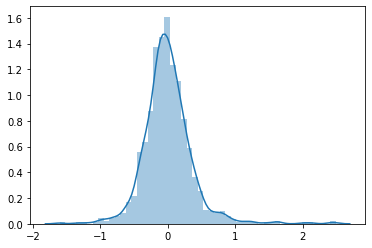

In [65]:
##Residual Analysis:
y_train_pred = lm.predict(X_Linear_train_fst)
res = y_train - y_train_pred
sns.distplot(res)

In [66]:
### Prediction
cols = X_Linear_train.columns
X_Linear_test = X_test[cols]

In [67]:
X_Linear_test_fst = sm.add_constant(X_Linear_test,has_constant='add')

In [68]:
y_test_pred  =lm.predict(X_Linear_test_fst)

Text(0, 0.5, 'y_pred')

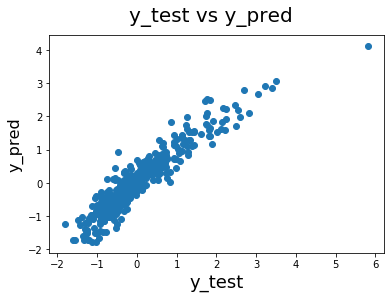

In [69]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   

In [70]:
##Evaluation
r2_score(y_true = y_test , y_pred =y_test_pred)

0.8799810433226288

### Deleting columns with high P value from main dataset for further models

In [71]:
main_cols_drop =['BsmtUnfSF','LotFrontage','LandSlope', 'RoofStyle','Electrical','GarageYrBlt_Age','PoolArea','LandContour']

In [72]:
data.drop(main_cols_drop,axis=1,inplace=True)

### 2.Decision Tree Regressor

In [73]:
from sklearn.tree import DecisionTreeRegressor

In [74]:
dt =DecisionTreeRegressor(random_state=42,max_depth=12,min_samples_leaf=10)
np.random.seed(0)
dt_train,dt_test=train_test_split(data,random_state=100,test_size=0.30,train_size=0.70)

In [75]:
dt_test.head(3)

MSSubClass  MSZoning  LotArea  LotShape  LotConfig  Neighborhood  \
58           60         3    13682         1          1            22   
342          90         3     8544         3          4            12   
472         180         4     3675         3          4             7   

     Condition1  Condition2  BldgType  HouseStyle  OverallQual  OverallCond  \
58            2           2         0           5           10            5   
342           2           2         2           2            3            4   
472           2           2         4           7            6            5   

     RoofMatl  MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  \
58          0           1      1031.0          0          4           2   
342         0           1       340.0          3          4           3   
472         0           1        80.0          3          4           2   

     BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  \
58          0         4             1             6           0             6   
342         3         2             4             4           0             4   
472         2         4             1             2         459             6   

     Heating  HeatingQC  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  \
58         1          0      1519       2945             0         3   
342        5          1         0       1040             0         2   
472        1          0         0       1072             1         1   

     HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  Functional  \
58          1             3             1            2           6   
342         0             2             2            3           6   
472         0             2             1            3           6   

     Fireplaces  FireplaceQu  GarageType  GarageFinish  GarageCars  \
58            1            2           3             0           3   
342           0            3           5             3           2   
472           0            3           2             2           2   

     GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  \
58            5           5           2         192            0   
342           5           5           2           0            0   
472           5           5           2           0           28   

     EnclosedPorch  ScreenPorch  SaleType  SaleCondition  SalePrice  TotalSF  \
58              37            0         6              5     438780     2929   
342              0            0         8              4      87500        0   
472              0            0         8              4     148000      547   

     House_age  Remodelled  
58          14          14  
342         71          70  
472         15          15

In [76]:
scaler =MinMaxScaler()

In [77]:
dt_train['SalePrice'] =scaler.fit_transform(dt_train[['SalePrice']])
dt_test['SalePrice']  =scaler.transform(dt_test[['SalePrice']])

In [78]:
dt_train.SalePrice.describe()

count    1003.000000
mean        0.249908
std         0.132775
min         0.000000
25%         0.164021
50%         0.220370
75%         0.304461
max         1.000000
Name: SalePrice, dtype: float64

In [79]:
y_train =dt_train.pop('SalePrice') 
X_train =dt_train
y_test  =dt_test.pop('SalePrice')
X_test  =dt_test

In [80]:
## Fit Decision Tree Model
dt.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=12,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

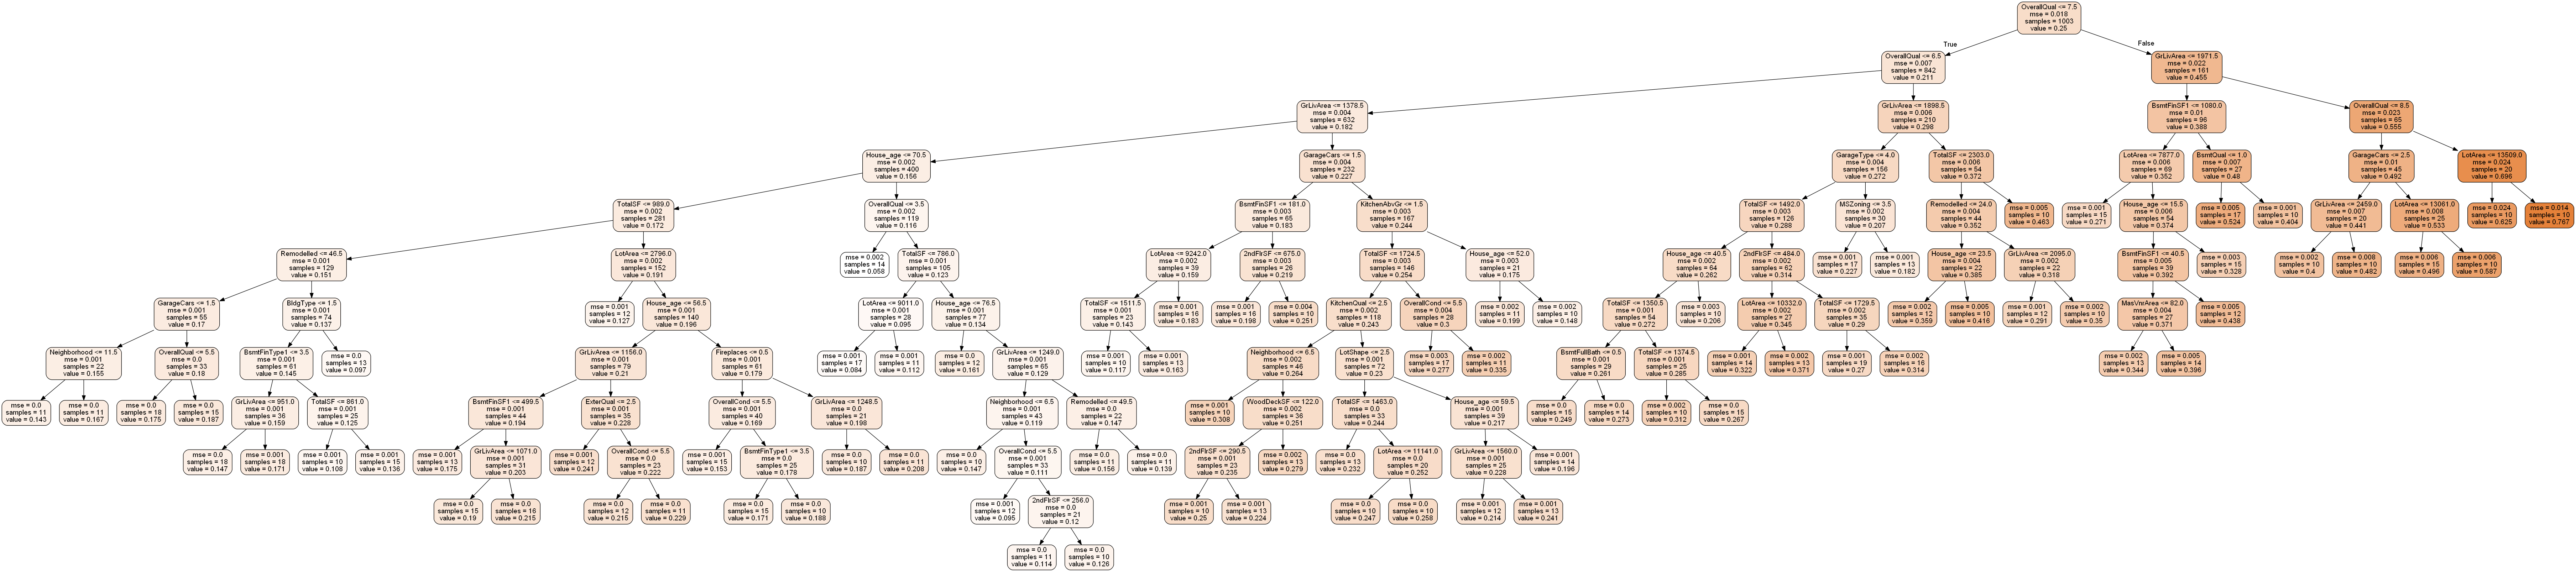

In [81]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

dot_data = StringIO()

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X_train.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [82]:
y_train_pred =dt.predict(X_train)

In [83]:
r2_score(y_train,y_train_pred)

0.8977061461829916

In [84]:
y_test_pred = dt.predict(X_test)

In [85]:
r2_score(y_test,y_test_pred)

0.8031324240831869

In [86]:
##HyperParamter Tuning

In [87]:
dt = DecisionTreeRegressor(random_state=42)

In [88]:
from sklearn.model_selection import GridSearchCV

In [89]:
# Create the parameter grid based on the results of random search 
params = {'max_depth':[4,8,10,15,20],'min_samples_leaf':[5,10,20,50,100]}

In [90]:
grid_search = GridSearchCV(estimator=dt,param_grid=params,cv=4,n_jobs=-1,verbose=1)

In [91]:
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    7.6s finished


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=42, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10, 15, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
  

In [92]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.020736      0.005446         0.012993        0.005474   
1       0.018486      0.002691         0.004248        0.000434   
2       0.024983      0.008511         0.007246        0.002485   
3       0.021487      0.004385         0.008745        0.002949   
4       0.016989      0.003535         0.004247        0.000433   

  param_max_depth param_min_samples_leaf  \
0               4                      5   
1               4                     10   
2               4                     20   
3               4                     50   
4               4                    100   

                                      params  split0_test_score  \
0    {'max_depth': 4, 'min_samples_leaf': 5}           0.699382   
1   {'max_depth': 4, 'min_samples_leaf': 10}           0.687543   
2   {'max_depth': 4, 'min_samples_leaf': 20}           0.706911   
3   {'max_depth': 4, 'min_samples_leaf': 50}           0.674431   
4  {'max_depth': 4, 'min_samples_leaf': 100}           0.589279   

   split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0           0.670237           0.719202           0.734547         0.705842   
1           0.687312           0.685244           0.763859         0.705990   
2           0.753886           0.713479           0.703435         0.719428   
3           0.659636           0.699621           0.671428         0.676279   
4           0.600816           0.640713           0.619494         0.612576   

   std_test_score  rank_test_score  
0        0.024041               15  
1        0.033423               14  
2        0.020219               13  
3        0.014567               20  
4        0.019497               21

In [93]:
score_df.nlargest(5,'mean_test_score')

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
5        0.028732      0.005845         0.004751        0.002046   
15       0.031480      0.008436         0.009997        0.009818   
20       0.036609      0.005290         0.004248        0.000435   
10       0.025483      0.002179         0.006747        0.004202   
7        0.026981      0.015009         0.004498        0.000866   

   param_max_depth param_min_samples_leaf  \
5                8                      5   
15              15                      5   
20              20                      5   
10              10                      5   
7                8                     20   

                                      params  split0_test_score  \
5    {'max_depth': 8, 'min_samples_leaf': 5}           0.774973   
15  {'max_depth': 15, 'min_samples_leaf': 5}           0.770565   
20  {'max_depth': 20, 'min_samples_leaf': 5}           0.770565   
10  {'max_depth': 10, 'min_samples_leaf': 5}           0.765882   
7   {'max_depth': 8, 'min_samples_leaf': 20}           0.736761   

    split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
5            0.745914           0.791068           0.757263         0.767305   
15           0.747010           0.790271           0.756230         0.766019   
20           0.747010           0.790271           0.756230         0.766019   
10           0.746139           0.791200           0.759378         0.765650   
7            0.781999           0.750943           0.743629         0.753333   

    std_test_score  rank_test_score  
5         0.017189                1  
15        0.016325                2  
20        0.016325                2  
10        0.016377                4  
7         0.017293                5

In [94]:
dt_best=grid_search.best_estimator_

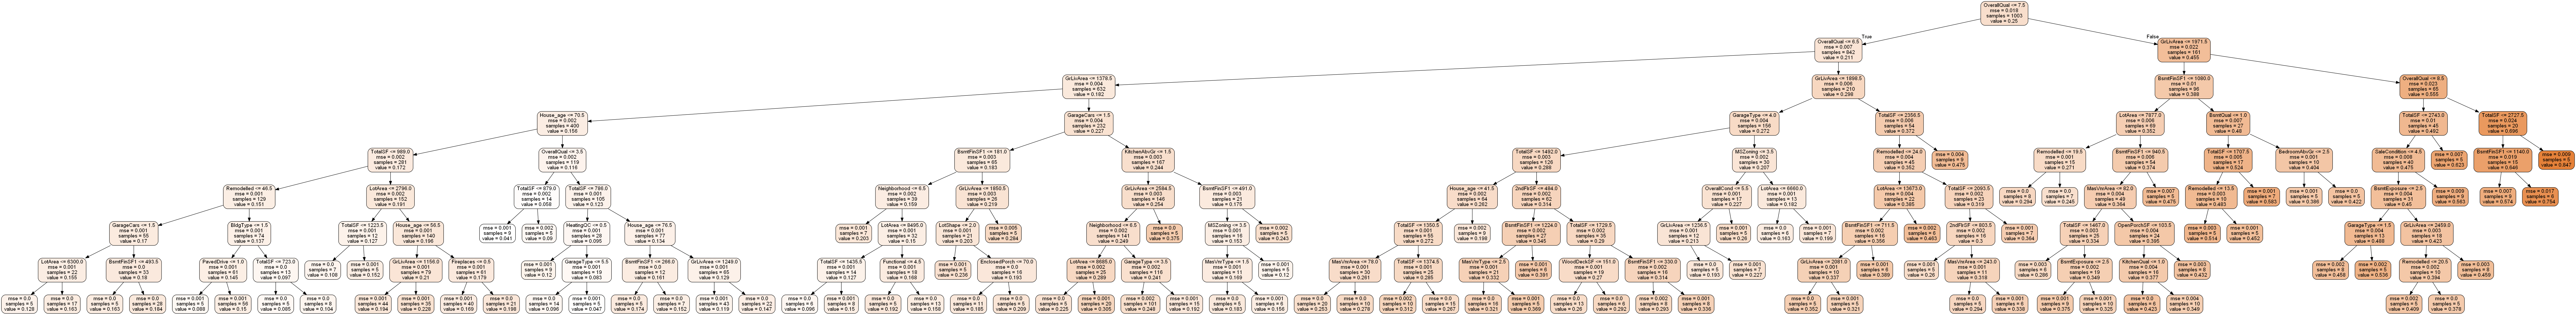

In [95]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

dot_data = StringIO()

export_graphviz(dt_best, out_file=dot_data, filled=True, rounded=True,
                feature_names=X_train.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [96]:
y_train_pred = dt_best.predict(X_train)

In [97]:
r2_score(y_train,y_train_pred)

0.927472196877047

In [98]:
y_test_pred =dt_best.predict(X_test)

In [99]:
r2_score(y_test,y_test_pred)

0.8127423263547315

### 3.Random Forest Regressor

In [100]:
from sklearn.ensemble import RandomForestRegressor

In [101]:
rf_train,rf_test=train_test_split(data,random_state=100,test_size=0.30,train_size=0.70)

### Scaling Target column
rf_train['SalePrice'] =scaler.fit_transform(rf_train[['SalePrice']])
rf_test['SalePrice']  =scaler.transform(rf_test[['SalePrice']])

y_train =rf_train.pop('SalePrice') 
X_train =rf_train
y_test  =rf_test.pop('SalePrice')
X_test  =rf_test

In [102]:
rf =RandomForestRegressor(random_state=42,n_jobs=1,max_depth=5,min_samples_leaf=10)

In [103]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [104]:
sample_tree = rf.estimators_[21]

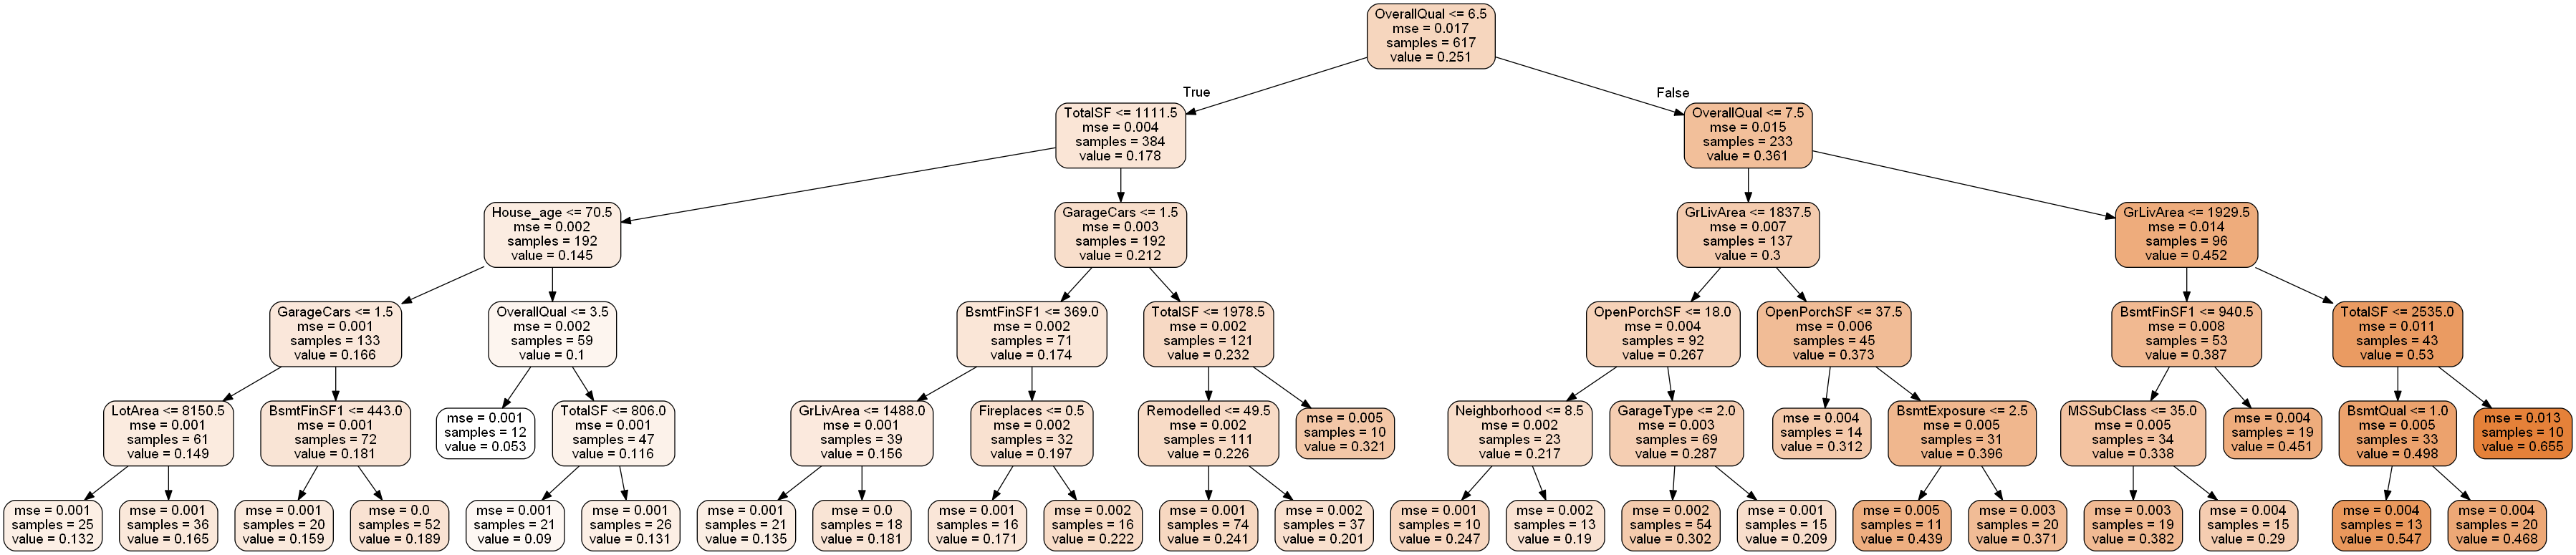

In [105]:
dot_data = StringIO()
export_graphviz(sample_tree, out_file=dot_data, filled=True, rounded=True,
                feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [106]:
y_train_pred =rf.predict(X_train)

In [107]:
r2_score(y_train,y_train_pred)

0.8917474832400458

In [108]:
y_test_pred =rf.predict(X_test)

In [109]:
r2_score(y_test,y_test_pred)

0.8777404442469919

In [110]:
### HyperParamater Tuning

In [111]:
rf=RandomForestRegressor(random_state=42)

In [112]:
params={'max_depth':[4,8,10,15,20],'min_samples_leaf':[5,10,20,50,100,200],'n_estimators':[10,25,50,75,100]}

In [113]:
grid_search = GridSearchCV(estimator=rf,param_grid=params,cv=4,n_jobs=-1,verbose=1)

In [114]:
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 150 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   34.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  1.7min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [115]:
rf_best=grid_search.best_estimator_

In [116]:
y_train_pred =rf_best.predict(X_train)

In [117]:
r2_score(y_train,y_train_pred)

0.9460739078921876

In [118]:
y_test =rf_best.predict(X_test)

In [119]:
r2_score(y_test,y_test_pred)

0.9886577605210851

### 4.Gradient Boost

In [120]:
gb_train,gb_test=train_test_split(data,random_state=100,test_size=0.30,train_size=0.70)
y_train =gb_train.pop('SalePrice')
X_train =gb_train
y_test  =gb_test.pop('SalePrice')
X_test  =gb_test

In [121]:
from sklearn.ensemble import GradientBoostingRegressor
gbreg = GradientBoostingRegressor()
gbreg.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [122]:
y_train_pred =gbreg.predict(X_train)

In [123]:
r2_score(y_train,y_train_pred,multioutput='variance_weighted')

0.9664475436727734

In [124]:
y_test_pred = gbreg.predict(X_test)

In [125]:
r2_score(y_test,y_test_pred)

0.9143184565203275

In [126]:
params ={'learning_rate':[0.1,0.2,0.3],'max_depth':[3,6,8],'min_samples_leaf':[4,8,12],
        'n_estimators':[100]}
grid_search =GridSearchCV(estimator=gbreg,param_grid=params,n_jobs=-1,cv=2,refit=True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=2, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                 

In [127]:
gbreg_best=grid_search.best_estimator_

In [128]:
y_train_pred =gbreg_best.predict(X_train)
r2_score(y_train,y_train_pred)

0.9751465114325673

In [129]:
y_test_pred = gbreg_best.predict(X_test)
r2_score(y_test,y_test_pred)

0.909844698586881

### 5.XG Boost

In [130]:
xg_train,xg_test=train_test_split(data,random_state=100,test_size=0.30,train_size=0.70)

In [131]:
y_train =xg_train.pop('SalePrice')
X_train =xg_train
y_test  =xg_test.pop('SalePrice')
X_test  =xg_test

In [132]:
import xgboost as xgb
xgreg = xgb.XGBRegressor()
xgreg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [133]:
y_train_pred =xgreg.predict(X_train)

In [134]:
r2_score(y_train,y_train_pred,multioutput='variance_weighted')

0.9997723600935727

In [135]:
y_test_pred = xgreg.predict(X_test)

In [136]:
r2_score(y_test,y_test_pred)

0.8811443949759944

In [137]:
### Hyperparameter Tuning

In [138]:
params ={'learning_rate':[0.35, 0.375, 0.4, 0.425, 0.45,0.5],'max_depth':[3,4,6,7,8,10],'min_child_weight':[15,18,20,23,25,27],
        'n_estimators':[90,100,110,120,130]}
grid_search =GridSearchCV(estimator=xgreg,param_grid=params,n_jobs=-1,cv=3,refit=True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs...
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.35, 0.375, 0.4, 0.425, 0.45, 0.5],
   

In [139]:
xgreg_best=grid_search.best_estimator_

In [140]:
y_train_pred =xgreg_best.predict(X_train)
r2_score(y_train,y_train_pred)

0.998875743946468

In [141]:
y_test_pred = xgreg_best.predict(X_test)
r2_score(y_test,y_test_pred)

0.8755088481655378

### 6.Ridge Regression

In [142]:
RR_train,RR_test=train_test_split(data,random_state=100,test_size=0.30,train_size=0.70)

In [143]:
y_train =RR_train.pop('SalePrice')
X_train =RR_train
y_test  =RR_test.pop('SalePrice')
X_test  =RR_test

In [144]:
Scaler =MinMaxScaler()
cols = X_train.columns
X_train[cols] =Scaler.fit_transform(X_train[cols])
X_test[cols] =Scaler.transform(X_test[cols])

In [145]:
from sklearn.linear_model import Ridge

In [146]:
##HyperParameter tuning
ridge =Ridge()
params ={'alpha':[0.05, 0.1,0.9, 1.0, 3.0,80.0,100.0]}
grid_search =GridSearchCV(estimator=ridge,param_grid=params,scoring= 'neg_mean_absolute_error',cv=5,verbose=1,return_train_score=True)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.05, 0.1, 0.9, 1.0, 3.0, 80.0, 100.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [147]:
grid_search.best_params_

{'alpha': 1.0}

In [148]:
ridge_result =pd.DataFrame(grid_search.cv_results_)

In [149]:
ridge_result.head(3)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.092167      0.160941         0.003395        0.001499        0.05   
1       0.004513      0.002548         0.001406        0.001203         0.1   
2       0.006031      0.000930         0.001596        0.001621         0.9   

            params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.05}      -16198.354335      -17632.259862      -19087.309039   
1   {'alpha': 0.1}      -16195.552148      -17595.503024      -19070.424230   
2   {'alpha': 0.9}      -16285.075025      -17332.944336      -19005.180008   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0      -19687.419575      -19529.012565    -18426.871075     1329.478885   
1      -19659.664023      -19535.185116    -18411.265708     1328.987470   
2      -19322.032464      -19581.845442    -18305.415455     1279.056653   

   rank_test_score  split0_train_score  split1_train_score  \
0                4       -17259.153946       -16901.572964   
1                3       -17255.016275       -16899.683393   
2                2       -17300.652885       -16944.710702   

   split2_train_score  split3_train_score  split4_train_score  \
0       -16962.480854       -16580.775945       -16604.602102   
1       -16953.123422       -16573.783206       -16594.757784   
2       -16969.306758       -16618.360563       -16599.742769   

   mean_train_score  std_train_score  
0     -16861.717162       250.891979  
1     -16855.272816       252.367334  
2     -16886.554735       259.189703

In [150]:
ridge_result['param_alpha']=ridge_result['param_alpha'].astype('int32')

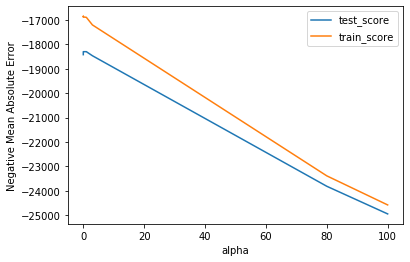

In [151]:
plt.plot(ridge_result['param_alpha'],ridge_result['mean_test_score'])
plt.plot(ridge_result['param_alpha'],ridge_result['mean_train_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.legend(['test_score','train_score'])

In [152]:
ridge_best = grid_search.best_estimator_
y_train_pred =ridge_best.predict(X_train)

In [153]:
r2_score(y_train,y_train_pred)

0.8967888004964575

In [154]:
y_test_pred =ridge_best.predict(X_test)

In [155]:
r2_score(y_test,y_test_pred)

0.891353604277253

In [156]:
## Storing ridge coefficient
col2=list(ridge_best.coef_)
## Adding intercept value
col2.insert(0,ridge_best.intercept_)
## Column 1 values
col1 =X_train.columns
## Adding constant term to column1
col1= col1.insert(0,'Constant')
## table 
Ridge_table =pd.DataFrame(list(zip(col1,col2)))
Ridge_table.columns =['Feature','Co_efficient']
Ridge_table.sort_values(by='Co_efficient',ascending=True).head(10)

Feature  Co_efficient
27      2ndFlrSF -33612.782101
16     ExterQual -30924.672954
33  KitchenAbvGr -28412.033839
34   KitchenQual -26120.542721
51     House_age -26074.984618
32  BedroomAbvGr -19963.763365
25       Heating -17606.823833
1     MSSubClass -15891.384296
19      BsmtQual -14534.758067
8     Condition2 -11468.638014

#### The top 5 features being:

1. GrLivArea
2. BsmtFinSF1
3. OverallQual	
4. MasVnrArea
5. LotArea

### 7.Lasso Regression

In [157]:
from sklearn.linear_model import Lasso

In [158]:
LR_train,LR_test=train_test_split(data,random_state=100,test_size=0.30,train_size=0.70)

In [159]:
y_train =LR_train.pop('SalePrice')
X_train =LR_train
y_test  =LR_test.pop('SalePrice')
X_test  =LR_test

In [160]:
Scaler =MinMaxScaler()
cols = X_train.columns
X_train[cols] =Scaler.fit_transform(X_train[cols])
X_test[cols] =Scaler.transform(X_test[cols])

In [161]:
params={'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 0.8, 0.9, 1.0, 3.0,10.0,30.0,80.0,100.0,150.0]}

In [162]:
lasso =Lasso()
grid_search = GridSearchCV(estimator=lasso,param_grid  =params,scoring= 'neg_mean_absolute_error', cv=5,verbose=1,return_train_score=True)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    1.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.8, 0.9,
                                   1.0, 3.0, 10.0, 30.0, 80.0, 100.0, 150.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [163]:
grid_search.best_params_

{'alpha': 100.0}

In [164]:
lasso_table =pd.DataFrame(grid_search.cv_results_)

In [165]:
lasso_table.head(3)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.090643      0.141560         0.000330        0.000660      0.0001   
1       0.016074      0.006646         0.003934        0.003619       0.001   
2       0.010957      0.002075         0.001001        0.002003        0.01   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}      -16205.344499      -17672.179917      -19112.330543   
1   {'alpha': 0.001}      -16205.336762      -17672.172191      -19112.325498   
2    {'alpha': 0.01}      -16205.260206      -17672.094135      -19112.275783   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0      -19715.995829      -19521.923497    -18445.554857     1329.197560   
1      -19715.987915      -19521.916397    -18445.547753     1329.197899   
2      -19715.906243      -19521.846518    -18445.476577     1329.200870   

   rank_test_score  split0_train_score  split1_train_score  \
0               14       -17264.739619       -16905.517715   
1               13       -17264.736442       -16905.514994   
2               12       -17264.704524       -16905.487767   

   split2_train_score  split3_train_score  split4_train_score  \
0       -16975.159092       -16588.060518       -16615.951976   
1       -16975.153671       -16588.058862       -16615.947384   
2       -16975.100360       -16588.042060       -16615.901658   

   mean_train_score  std_train_score  
0     -16869.885784       249.867771  
1     -16869.882271       249.867539  
2     -16869.847274       249.865268

In [166]:
lasso_table['param_alpha'] = lasso_table['param_alpha'].astype('float32')

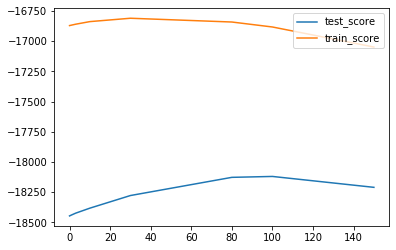

In [167]:
plt.plot(lasso_table['param_alpha'],lasso_table['mean_test_score'])
plt.plot(lasso_table['param_alpha'],lasso_table['mean_train_score'])
plt.legend(['test_score','train_score'],loc= 'upper right')
plt.show()

In [168]:
lasso_best=grid_search.best_estimator_
lasso_best

Lasso(alpha=100.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [169]:
y_train_pred =lasso_best.predict(X_train)
y_test_pred =lasso_best.predict(X_test)

In [170]:
r2_score(y_train,y_train_pred)

0.8950161650816542

In [171]:
r2_score(y_test,y_test_pred)

0.8957388206813884

In [172]:
col2 = list(lasso_best.coef_)
col2.insert(0,lasso_best.intercept_)
col1 =X_train.columns
col1=col1.insert(0,'Constant')
lasso_1 = pd.DataFrame(list(zip(col1,col2)))
lasso_1.columns=['Feature','Coefficeint']

In [173]:
lasso_1.sort_values('Coefficeint',ascending=True).head(10)


Feature   Coefficeint
16     ExterQual -31227.354082
27      2ndFlrSF -30384.546698
51     House_age -29162.077627
34   KitchenQual -26362.594846
1     MSSubClass -16907.732721
32  BedroomAbvGr -16547.983075
19      BsmtQual -14910.878523
33  KitchenAbvGr -14710.843846
21  BsmtExposure -10327.406379
37   FireplaceQu  -7964.399496

#### The top 5 features being:

1. GrLivArea
2. BsmtFinSF1
3. OverallQual	
4. MasVnrArea
5. LotArea

### 8.LightGBM Regresssor

In [174]:
import lightgbm as lgb
lgb1=lgb.LGBMRegressor(random_state=42)

In [175]:
LG_train,LG_test=train_test_split(data,random_state=100,test_size=0.30,train_size=0.70)

In [176]:
y_train =LG_train.pop('SalePrice')
X_train =LG_train
y_test  =LG_test.pop('SalePrice')
X_test  =LG_test

In [177]:
params ={"objective" :["regression"],'metric' : ["rmse"],'num_leaves':[10,20,30,60],'learning_rate':[.001,0.1,1.0,5.0],
          'n_estimators':[100,150,180],'max_depth': [10,15,18,20]}

In [178]:
grid_search =GridSearchCV(estimator=lgb1,param_grid=params,verbose=1,cv=3,n_jobs=2,return_train_score=True)

In [179]:
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 192 candidates, totalling 576 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   27.8s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   48.5s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  1.4min
[Parallel(n_jobs=2)]: Done 576 out of 576 | elapsed:  1.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state=42,
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='deprecated', n_jobs=2,
             param_grid={'learning_rate': [0.001, 0.1, 1.0, 5.0],
                         'max_depth': [10, 15, 18, 20], 'metric': ['rmse'],
                         'n_estimators': [1

In [180]:
grid_search.best_estimator_

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=10,
              metric='rmse', min_child_samples=20, min_child_weight=0.001,
              min_split_gain=0.0, n_estimators=150, n_jobs=-1, num_leaves=10,
              objective='regression', random_state=42, reg_alpha=0.0,
              reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

In [181]:
grid_search.best_params_

{'learning_rate': 0.1,
 'max_depth': 10,
 'metric': 'rmse',
 'n_estimators': 150,
 'num_leaves': 10,
 'objective': 'regression'}

In [182]:
lgbm_table = pd.DataFrame(grid_search.cv_results_)
lgbm_table.head(3)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.242515      0.054747         0.013082    3.595857e-03   
1       0.198867      0.019104         0.007874    6.379086e-03   
2       0.193759      0.006737         0.015624    5.150430e-07   

  param_learning_rate param_max_depth param_metric param_n_estimators  \
0               0.001              10         rmse                100   
1               0.001              10         rmse                100   
2               0.001              10         rmse                100   

  param_num_leaves param_objective  \
0               10      regression   
1               20      regression   
2               30      regression   

                                              params  split0_test_score  \
0  {'learning_rate': 0.001, 'max_depth': 10, 'met...           0.125174   
1  {'learning_rate': 0.001, 'max_depth': 10, 'met...           0.132641   
2  {'learning_rate': 0.001, 'max_depth': 10, 'met...           0.133527   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.138202           0.127981         0.130452        0.005598   
1           0.144108           0.135551         0.137433        0.004867   
2           0.145005           0.136493         0.138341        0.004865   

   rank_test_score  split0_train_score  split1_train_score  \
0              141            0.140005            0.141081   
1              137            0.147839            0.148937   
2              129            0.149220            0.150106   

   split2_train_score  mean_train_score  std_train_score  
0            0.140742          0.140609         0.000449  
1            0.149548          0.148775         0.000707  
2            0.150894          0.150073         0.000684

In [183]:
lgbm_best =grid_search.best_estimator_
lgbm_best.fit(X_train,y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=10,
              metric='rmse', min_child_samples=20, min_child_weight=0.001,
              min_split_gain=0.0, n_estimators=150, n_jobs=-1, num_leaves=10,
              objective='regression', random_state=42, reg_alpha=0.0,
              reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

In [184]:
y_train_pred =lgbm_best.predict(X_train)
y_test_pred =lgbm_best.predict(X_test)

In [185]:
r2_score(y_train,y_train_pred)

0.9792755458201547

In [186]:
r2_score(y_test,y_test_pred)

0.9062684165757573

### 9.Catboost 

In [187]:
from catboost import CatBoostRegressor

In [188]:
CB_train,CB_test=train_test_split(data,random_state=100,test_size=0.30,train_size=0.70)

In [189]:
y_train =CB_train.pop('SalePrice')
X_train =CB_train
y_test  =CB_test.pop('SalePrice')
X_test  =CB_test

In [190]:
cbr=CatBoostRegressor()

In [191]:
params={'iterations':[500],'depth':[4,5,6],'learning_rate':[0.001,.01,0.1,1],'random_seed' : [400, 100, 200],
       'loss_function': ['RMSE']}

In [192]:
grid_search =GridSearchCV(estimator=cbr,param_grid=params,scoring='neg_mean_squared_error', cv = 2)
grid_search.fit(X_train,y_train)

0:	learn: 78384.9421631	total: 271ms	remaining: 2m 15s
1:	learn: 78338.7869988	total: 274ms	remaining: 1m 8s
2:	learn: 78292.0952534	total: 276ms	remaining: 45.8s
3:	learn: 78245.4519557	total: 279ms	remaining: 34.6s
4:	learn: 78196.5462789	total: 281ms	remaining: 27.8s
5:	learn: 78155.2990943	total: 284ms	remaining: 23.3s
6:	learn: 78113.6771251	total: 287ms	remaining: 20.2s
7:	learn: 78069.7511258	total: 290ms	remaining: 17.8s
8:	learn: 78024.0117588	total: 293ms	remaining: 16s
9:	learn: 77979.7325953	total: 295ms	remaining: 14.5s
10:	learn: 77929.9961274	total: 298ms	remaining: 13.2s
11:	learn: 77883.3981190	total: 302ms	remaining: 12.3s
12:	learn: 77844.4538066	total: 305ms	remaining: 11.4s
13:	learn: 77804.1703250	total: 307ms	remaining: 10.7s
14:	learn: 77757.9597431	total: 309ms	remaining: 10s
15:	learn: 77710.1336194	total: 312ms	remaining: 9.43s
16:	learn: 77666.6489039	total: 314ms	remaining: 8.94s
17:	learn: 77619.7124740	total: 317ms	remaining: 8.49s
18:	learn: 77573.126685

GridSearchCV(cv=2, error_score=nan,
             estimator=<catboost.core.CatBoostRegressor object at 0x0000022BC38C62C8>,
             iid='deprecated', n_jobs=None,
             param_grid={'depth': [4, 5, 6], 'iterations': [500],
                         'learning_rate': [0.001, 0.01, 0.1, 1],
                         'loss_function': ['RMSE'],
                         'random_seed': [400, 100, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [193]:
grid_search.best_estimator_

In [194]:
cbr_best = grid_search.best_estimator_
cbr_best.fit(X_train,y_train)

0:	learn: 71659.8116966	total: 3.22ms	remaining: 1.61s
1:	learn: 67060.1566576	total: 5.94ms	remaining: 1.48s
2:	learn: 63187.3663145	total: 8.51ms	remaining: 1.41s
3:	learn: 59910.0080492	total: 11.5ms	remaining: 1.42s
4:	learn: 56932.3110181	total: 14.1ms	remaining: 1.4s
5:	learn: 53809.5039964	total: 16.7ms	remaining: 1.38s
6:	learn: 51134.4050403	total: 19.3ms	remaining: 1.36s
7:	learn: 48841.9816126	total: 21.9ms	remaining: 1.35s
8:	learn: 46692.7303601	total: 25.6ms	remaining: 1.4s
9:	learn: 44800.2880530	total: 28.1ms	remaining: 1.38s
10:	learn: 43109.9579336	total: 30.7ms	remaining: 1.36s
11:	learn: 41421.3000973	total: 33.3ms	remaining: 1.35s
12:	learn: 39917.3737820	total: 36.1ms	remaining: 1.35s
13:	learn: 38542.1814689	total: 38.8ms	remaining: 1.35s
14:	learn: 37261.0925573	total: 41.4ms	remaining: 1.34s
15:	learn: 36087.7250358	total: 44.2ms	remaining: 1.34s
16:	learn: 35160.1305023	total: 46.7ms	remaining: 1.33s
17:	learn: 34331.1424031	total: 49.4ms	remaining: 1.32s
18:	

In [195]:
y_train_pred =cbr_best.predict(X_train)
y_test_pred = cbr_best.predict(X_test)

In [196]:
r2_score(y_train,y_train_pred)

0.9870440647809705

In [197]:
r2_score(y_test,y_test_pred)

0.9153339367510503

## Conclusion

Best model is Random Forest Regressor,Which is followed by Lasso and Ridge models where both train and test set has almost equal r2_score.

The top 5 features which explains the Lasso and Ridge models very well are:

    GrLivArea
    BsmtFinSF1
    OverallQual
    MasVnrArea
    LotArea

These features have more impact on determining house price. More Value of this feature makes house costly .So From company's perceptive find houses with more negative value of coefficient and once after buying house ,while selling improve the top feature which will improve the house price.

Top 5 Feature having Negative Coefficients:

    ExterQual
    2ndFlrSF
    House_age
    KitchenQual
    MSSubClass